# Tabular Playground Series - May 2021
Practice your ML skills on this approachable dataset!

In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, Isomap, MDS, SpectralEmbedding
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, log_loss

import itertools

In [12]:
TARGET_NAME = 'target'

In [5]:
path = '../../../data/kaggle/TPS_MAY2021/tabular-playground-series-may-2021/'

In [127]:
train_data = pd.read_csv(path + 'train.csv')
train_data[TARGET_NAME] = train_data[TARGET_NAME].str.slice(start=6).astype(int) - 1
test_data = pd.read_csv(path + 'test.csv')
submission = pd.read_csv(path + 'sample_submission.csv')

## 1. Look at th data

In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 52 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   id          100000 non-null  int64
 1   feature_0   100000 non-null  int64
 2   feature_1   100000 non-null  int64
 3   feature_2   100000 non-null  int64
 4   feature_3   100000 non-null  int64
 5   feature_4   100000 non-null  int64
 6   feature_5   100000 non-null  int64
 7   feature_6   100000 non-null  int64
 8   feature_7   100000 non-null  int64
 9   feature_8   100000 non-null  int64
 10  feature_9   100000 non-null  int64
 11  feature_10  100000 non-null  int64
 12  feature_11  100000 non-null  int64
 13  feature_12  100000 non-null  int64
 14  feature_13  100000 non-null  int64
 15  feature_14  100000 non-null  int64
 16  feature_15  100000 non-null  int64
 17  feature_16  100000 non-null  int64
 18  feature_17  100000 non-null  int64
 19  feature_18  100000 non-null  int64
 20  featu

In [204]:
train_data.describe()

id      feature_0      feature_1      feature_2  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean    49999.500000       0.257830       0.431720       0.114130   
std     28867.657797       0.929033       1.977862       0.519584   
min         0.000000       0.000000       0.000000       0.000000   
25%     24999.750000       0.000000       0.000000       0.000000   
50%     49999.500000       0.000000       0.000000       0.000000   
75%     74999.250000       0.000000       0.000000       0.000000   
max     99999.000000      10.000000      31.000000       6.000000   

           feature_3      feature_4      feature_5      feature_6  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.590550       0.599770       0.160820       0.731490   
std         1.844558       2.785531       0.601149       2.343465   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max        26.000000      38.000000      10.000000      27.000000   

           feature_7      feature_8  ...     feature_41     feature_42  \
count  100000.000000  100000.000000  ...  100000.000000  100000.000000   
mean        1.228920       0.903350  ...       0.582070       0.529230   
std         2.692732       3.415258  ...       2.003114       2.300826   
min         0.000000       0.000000  ...       0.000000      -2.000000   
25%         0.000000       0.000000  ...       0.000000       0.000000   
50%         0.000000       0.000000  ...       0.000000       0.000000   
75%         1.000000       0.000000  ...       0.000000       0.000000   
max        31.000000      39.000000  ...      32.000000      37.000000   

          feature_43     feature_44     feature_45     feature_46  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.616310       0.135100       0.358660       0.516810   
std         2.360955       0.627592       1.464187       2.171415   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max        33.000000       9.000000      26.000000      29.000000   

         feature_47     feature_48    feature_49         target  
count  100000.00000  100000.000000  100000.00000  100000.000000  
mean        0.39004       0.970850       0.55712       1.381160  
std         1.48735       2.576615       1.68093       0.810891  
min         0.00000       0.000000       0.00000       0.000000  
25%         0.00000       0.000000       0.00000       1.000000  
50%         0.00000       0.000000       0.00000       1.000000  
75%         0.00000       1.000000       0.00000       2.000000  
max        25.00000      44.000000      20.00000       3.000000  

[8 rows x 52 columns]

In [10]:
train_data.head(1).T

0
id                0
feature_0         0
feature_1         0
feature_2         1
feature_3         0
feature_4         1
feature_5         0
feature_6         0
feature_7         0
feature_8         0
feature_9         0
feature_10        0
feature_11        0
feature_12        0
feature_13        0
feature_14        0
feature_15        0
feature_16        0
feature_17        6
feature_18        0
feature_19        0
feature_20        0
feature_21        0
feature_22        0
feature_23        0
feature_24        0
feature_25        0
feature_26        0
feature_27        0
feature_28        0
feature_29        0
feature_30        1
feature_31        0
feature_32        0
feature_33        0
feature_34        1
feature_35        0
feature_36        0
feature_37        0
feature_38        0
feature_39        0
feature_40        3
feature_41        0
feature_42        0
feature_43       21
feature_44        0
feature_45        0
feature_46        0
feature_47        0
feature_48        0
feature_49        0
target      Class_2

In [17]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 51 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id          50000 non-null  int64
 1   feature_0   50000 non-null  int64
 2   feature_1   50000 non-null  int64
 3   feature_2   50000 non-null  int64
 4   feature_3   50000 non-null  int64
 5   feature_4   50000 non-null  int64
 6   feature_5   50000 non-null  int64
 7   feature_6   50000 non-null  int64
 8   feature_7   50000 non-null  int64
 9   feature_8   50000 non-null  int64
 10  feature_9   50000 non-null  int64
 11  feature_10  50000 non-null  int64
 12  feature_11  50000 non-null  int64
 13  feature_12  50000 non-null  int64
 14  feature_13  50000 non-null  int64
 15  feature_14  50000 non-null  int64
 16  feature_15  50000 non-null  int64
 17  feature_16  50000 non-null  int64
 18  feature_17  50000 non-null  int64
 19  feature_18  50000 non-null  int64
 20  feature_19  50000 non-null  

In [18]:
test_data.describe()

id     feature_0     feature_1     feature_2     feature_3  \
count   50000.000000  50000.000000  50000.000000  50000.000000  50000.000000   
mean   124999.500000      0.254620      0.443480      0.116720      0.584440   
std     14433.901067      0.910607      2.004536      0.524807      1.814083   
min    100000.000000      0.000000      0.000000      0.000000      0.000000   
25%    112499.750000      0.000000      0.000000      0.000000      0.000000   
50%    124999.500000      0.000000      0.000000      0.000000      0.000000   
75%    137499.250000      0.000000      0.000000      0.000000      0.000000   
max    149999.000000     10.000000     31.000000      6.000000     25.000000   

         feature_4    feature_5     feature_6     feature_7     feature_8  \
count  50000.00000  50000.00000  50000.000000  50000.000000  50000.000000   
mean       0.61264      0.16150      0.746000      1.238040      0.886440   
std        2.81958      0.60576      2.352495      2.728055      3.364154   
min        0.00000      0.00000      0.000000      0.000000      0.000000   
25%        0.00000      0.00000      0.000000      0.000000      0.000000   
50%        0.00000      0.00000      0.000000      0.000000      0.000000   
75%        0.00000      0.00000      0.000000      1.000000      0.000000   
max       38.00000      9.00000     25.000000     29.000000     35.000000   

       ...    feature_40    feature_41    feature_42    feature_43  \
count  ...  50000.000000  50000.000000  50000.000000  50000.000000   
mean   ...      0.719160      0.597140      0.532420      0.614220   
std    ...      1.749077      2.058195      2.347675      2.335616   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...      1.000000      0.000000      0.000000      0.000000   
max    ...     23.000000     31.000000     36.000000     30.000000   

         feature_44    feature_45    feature_46    feature_47   feature_48  \
count  50000.000000  50000.000000  50000.000000  50000.000000  50000.00000   
mean       0.133780      0.360580      0.527080      0.388220      0.98760   
std        0.623451      1.500722      2.191986      1.450816      2.63717   
min        0.000000      0.000000      0.000000      0.000000      0.00000   
25%        0.000000      0.000000      0.000000      0.000000      0.00000   
50%        0.000000      0.000000      0.000000      0.000000      0.00000   
75%        0.000000      0.000000      0.000000      0.000000      1.00000   
max        9.000000     29.000000     29.000000     26.000000     46.00000   

         feature_49  
count  50000.000000  
mean       0.565620  
std        1.700115  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max       21.000000  

[8 rows x 51 columns]

In [11]:
submission.head()

id  Class_1  Class_2  Class_3  Class_4
0  100000     0.25     0.25     0.25     0.25
1  100001     0.25     0.25     0.25     0.25
2  100002     0.25     0.25     0.25     0.25
3  100003     0.25     0.25     0.25     0.25
4  100004     0.25     0.25     0.25     0.25

## EDA

In [31]:
features = train_data.columns[1:-1]
features

Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14',
       'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19',
       'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24',
       'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29',
       'feature_30', 'feature_31', 'feature_32', 'feature_33', 'feature_34',
       'feature_35', 'feature_36', 'feature_37', 'feature_38', 'feature_39',
       'feature_40', 'feature_41', 'feature_42', 'feature_43', 'feature_44',
       'feature_45', 'feature_46', 'feature_47', 'feature_48', 'feature_49'],
      dtype='object')

### 1. Target distirbution

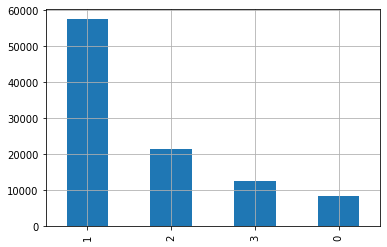

In [21]:
train_data[TARGET_NAME].value_counts().plot(kind='bar')
plt.grid()

### 2. Feature variance

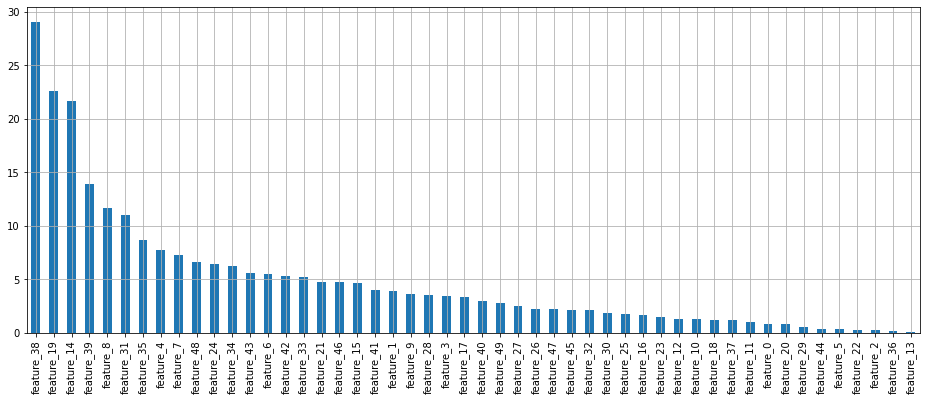

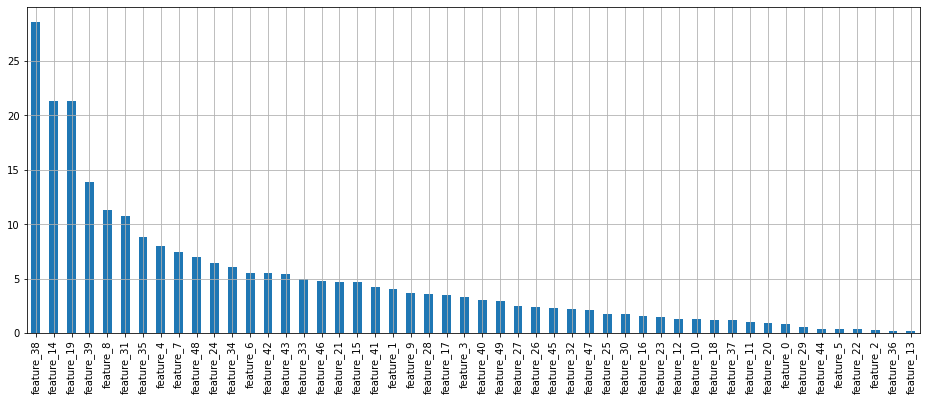

In [80]:
train_data[features].var().sort_values(ascending=False).plot(kind='bar', figsize=(16,6))
plt.grid()
plt.show()
test_data[features].var().sort_values(ascending=False).plot(kind='bar', figsize=(16,6))
plt.grid()
plt.show()

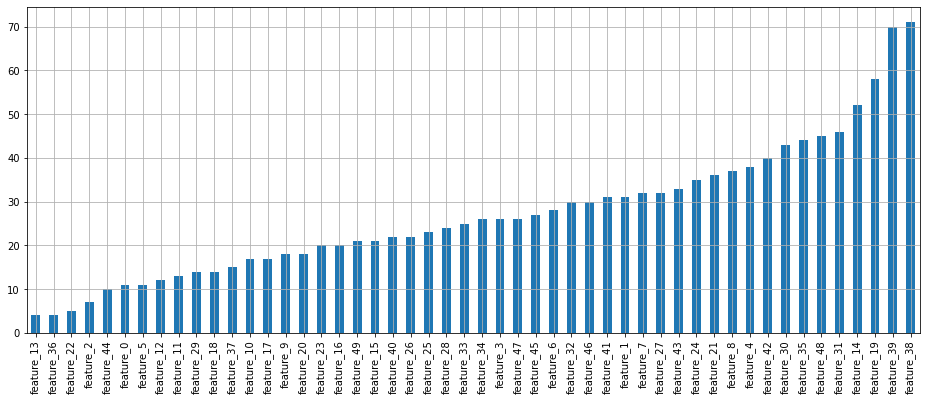

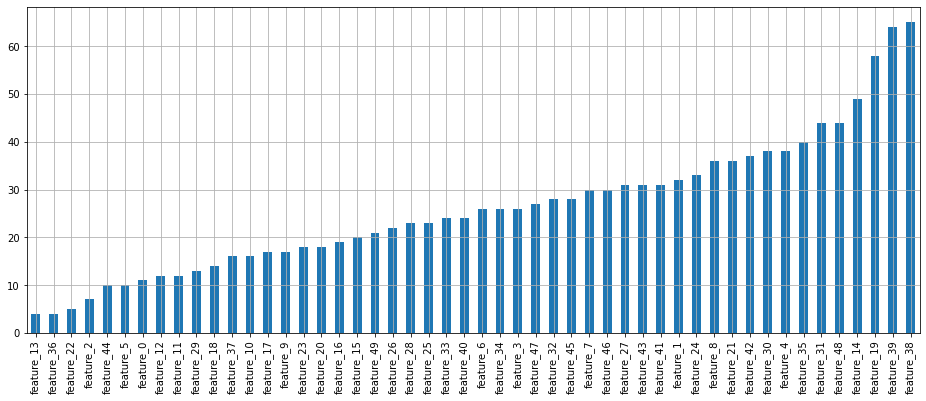

In [66]:
train_data[features].apply('nunique', axis=0).sort_values(ascending=True).plot(kind='bar', figsize=(16,6))
plt.grid()
plt.show()
test_data[features].apply('nunique', axis=0).sort_values(ascending=True).plot(kind='bar', figsize=(16,6))
plt.grid()
plt.show()

In [68]:
train_data[features].apply('nunique', axis=0).sort_values(ascending=True).head()

feature_13     4
feature_36     4
feature_22     5
feature_2      7
feature_44    10
dtype: int64

In [ ]:
cat_feat = [13, 36]

### 3. Transformed features distributions

In [ ]:
#all_df = pd.concat([train_data, test_data]).reset_index(drop = True)

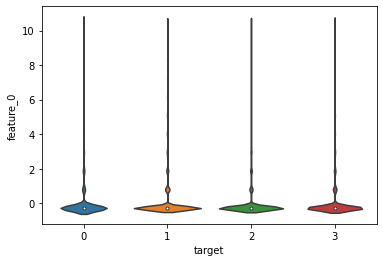

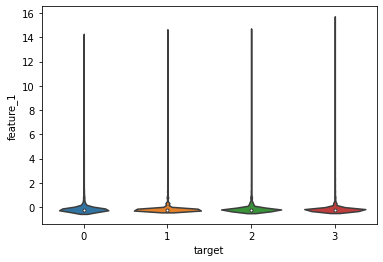

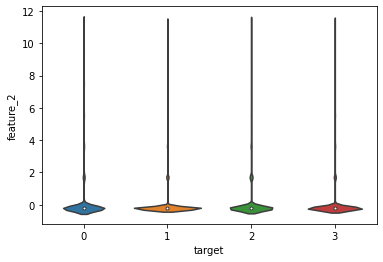

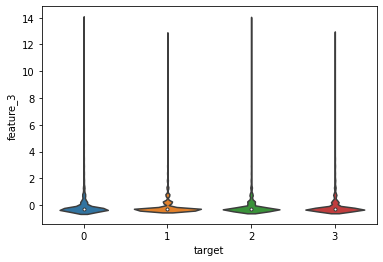

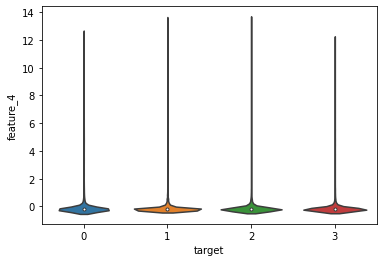

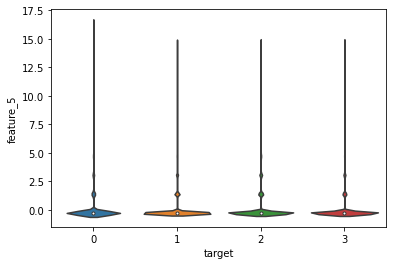

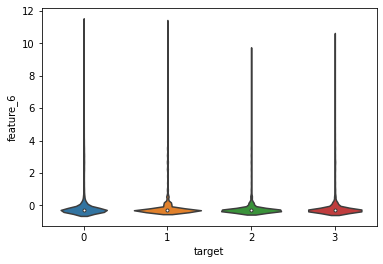

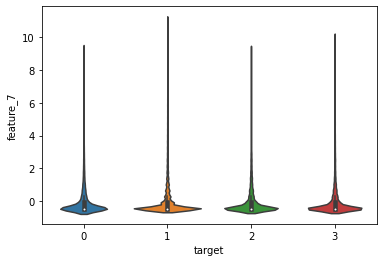

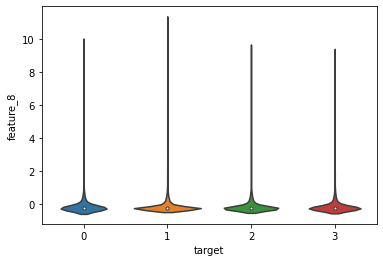

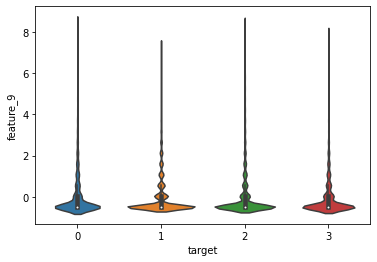

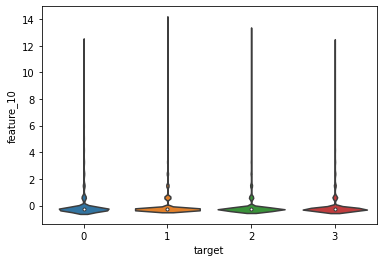

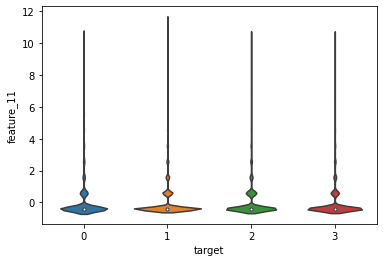

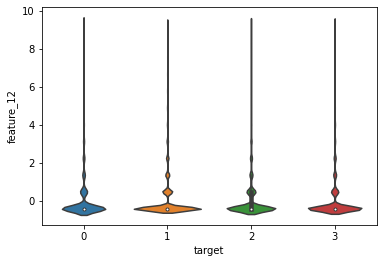

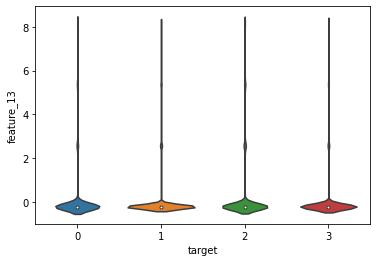

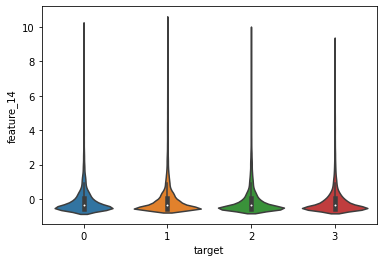

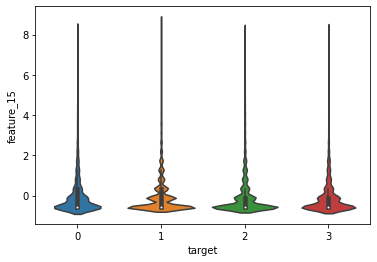

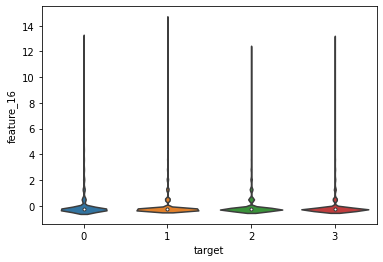

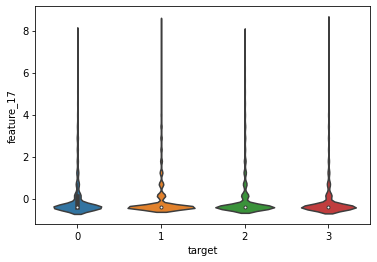

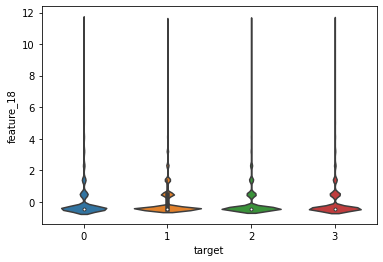

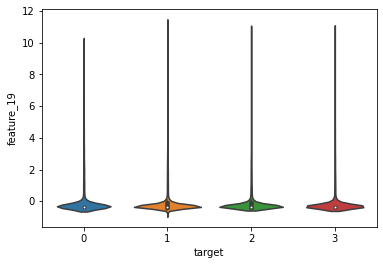

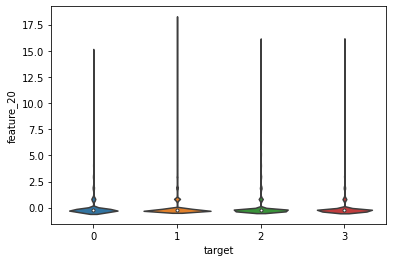

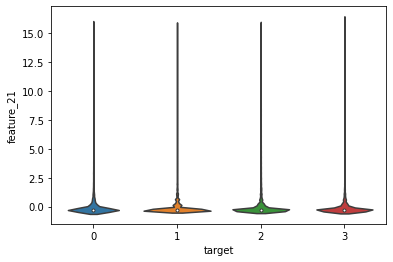

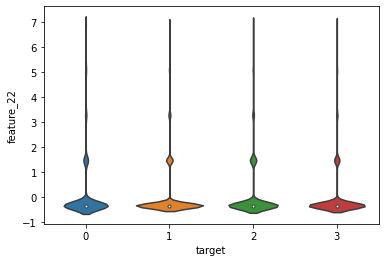

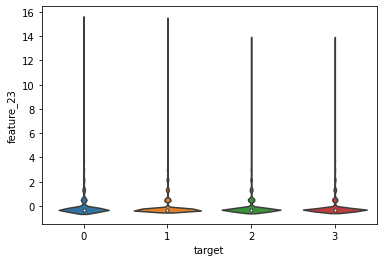

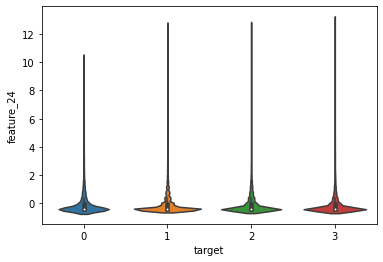

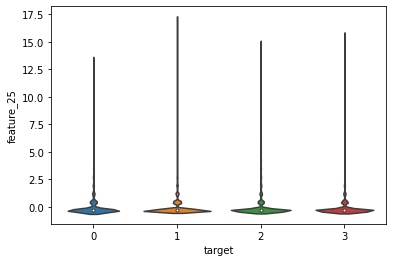

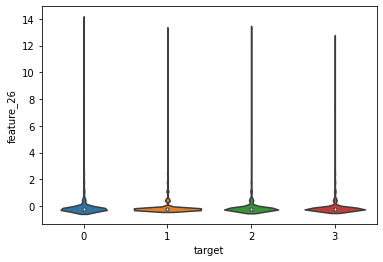

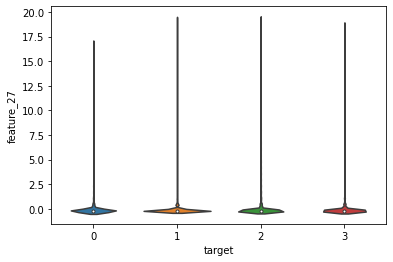

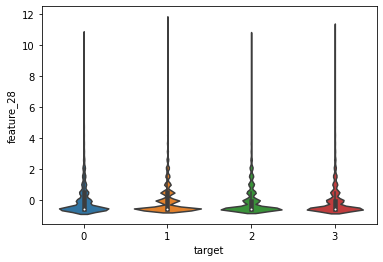

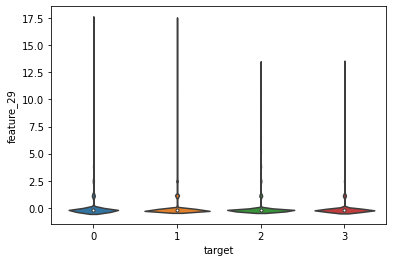

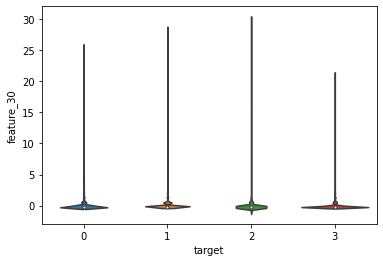

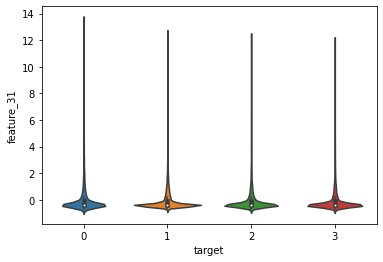

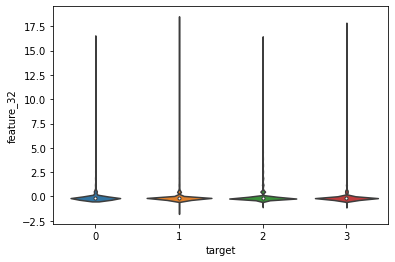

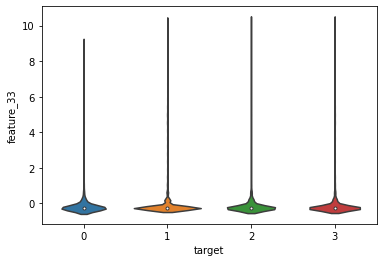

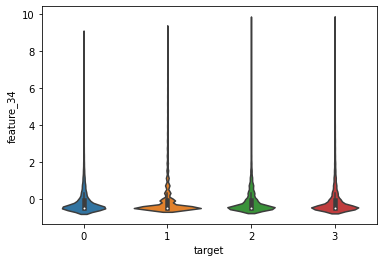

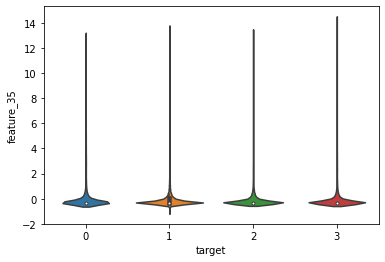

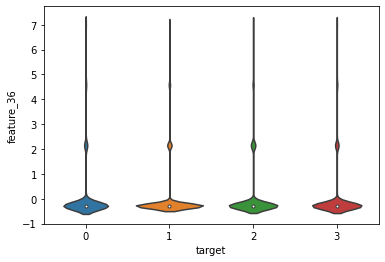

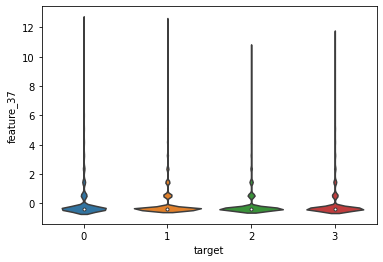

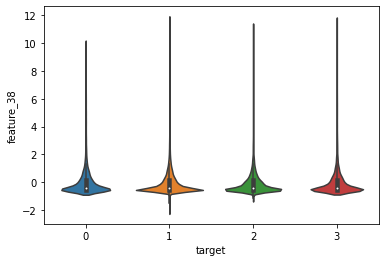

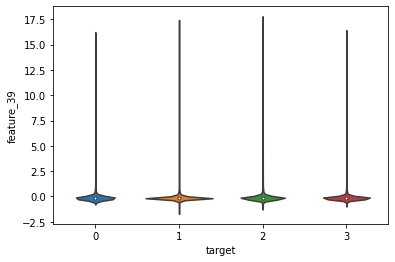

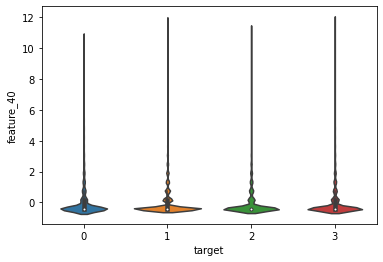

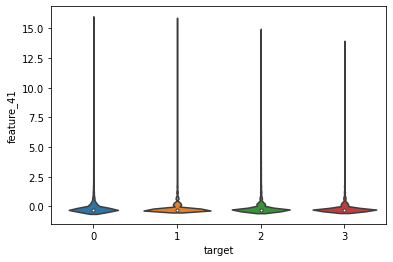

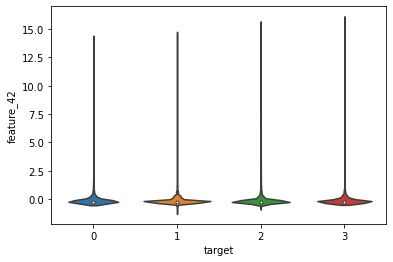

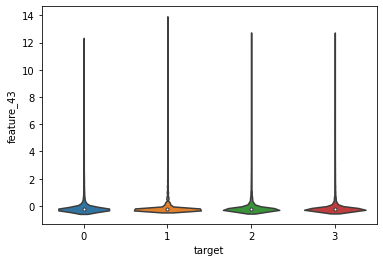

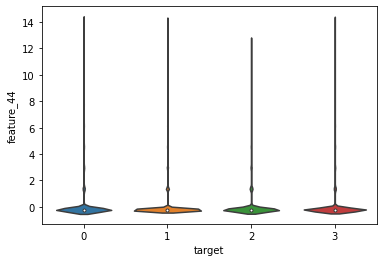

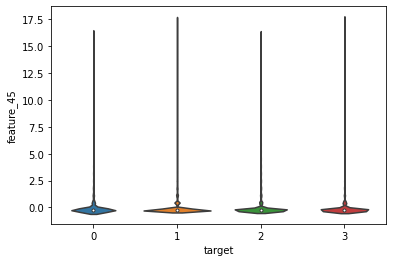

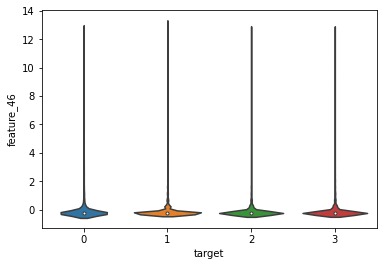

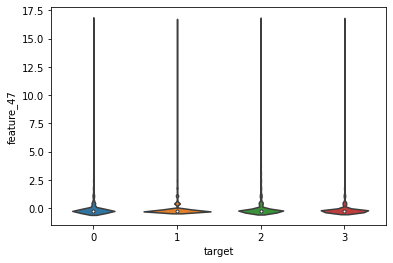

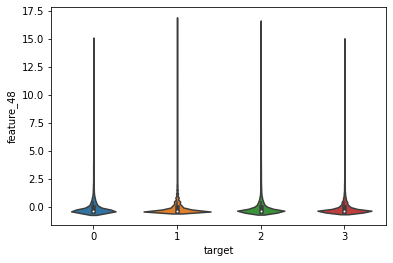

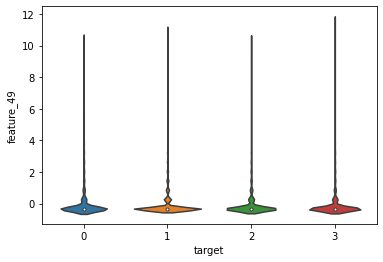

In [170]:
st_feat_val = pd.DataFrame(StandardScaler().fit_transform(train_data[features]), columns=features)
st_feat_val[TARGET_NAME] = train_data[TARGET_NAME]
for f in features:
    sns.violinplot(x=TARGET_NAME, y=f, data=st_feat_val)
    plt.show()

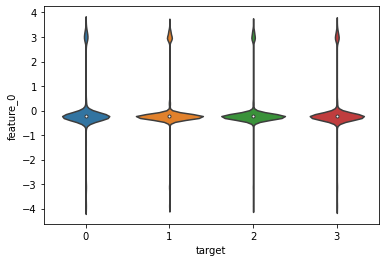

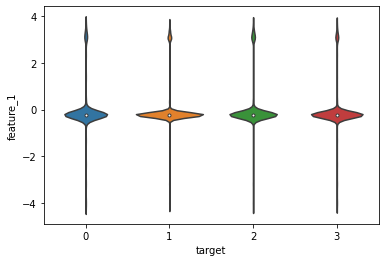

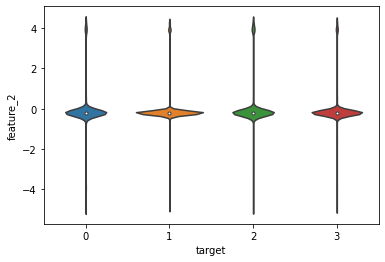

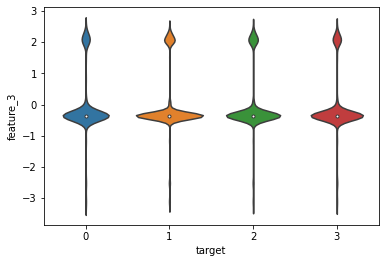

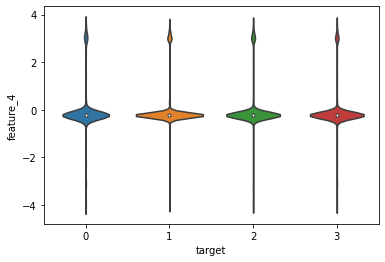

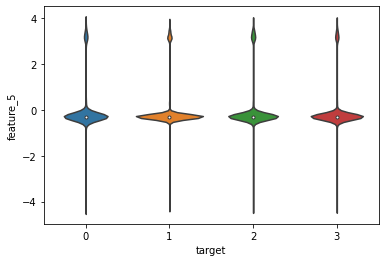

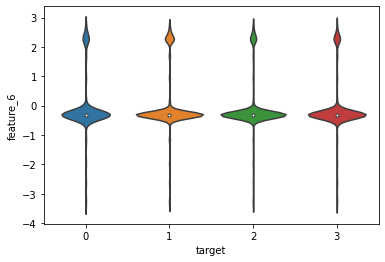

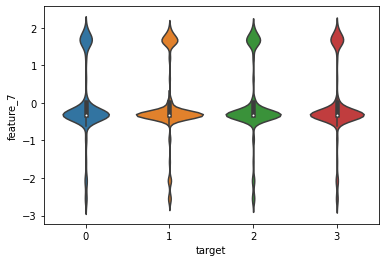

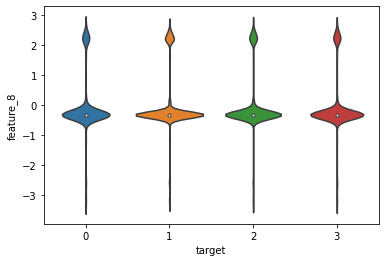

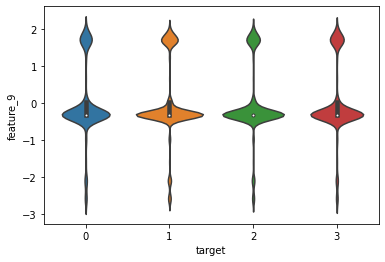

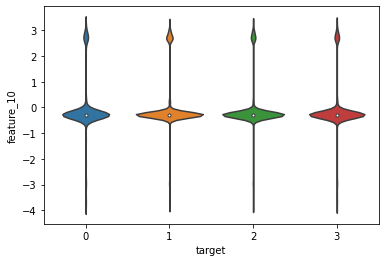

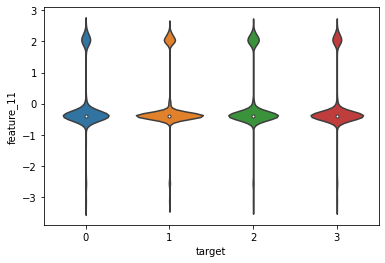

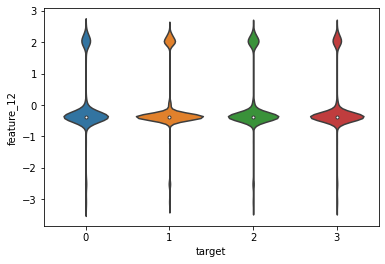

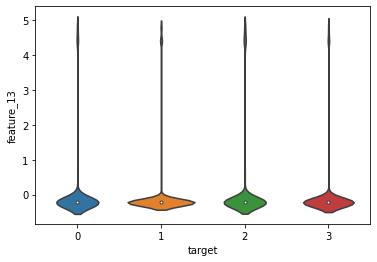

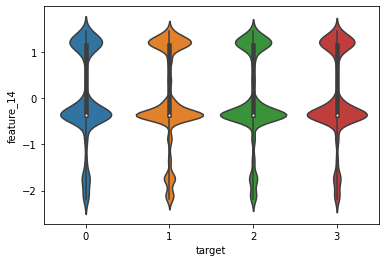

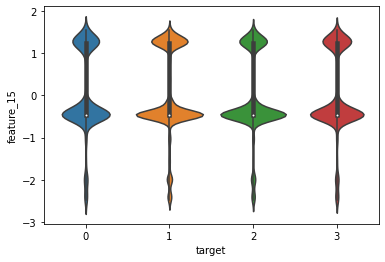

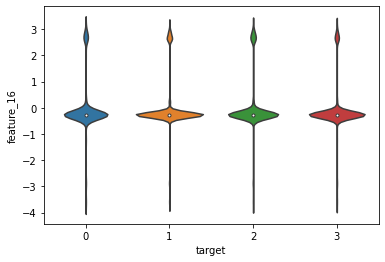

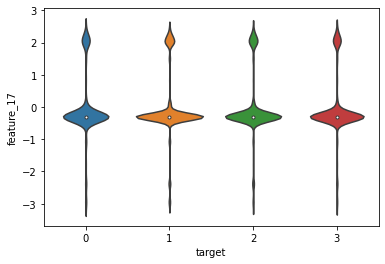

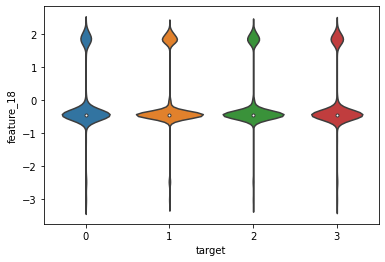

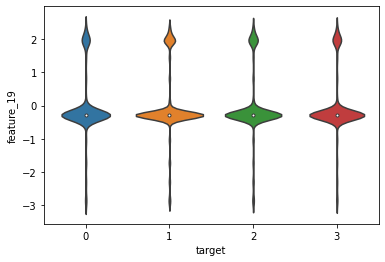

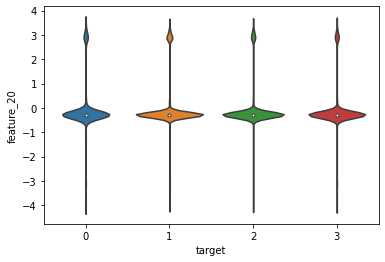

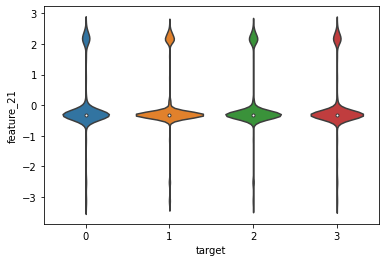

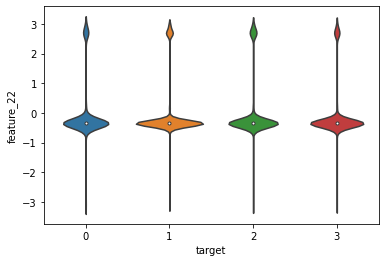

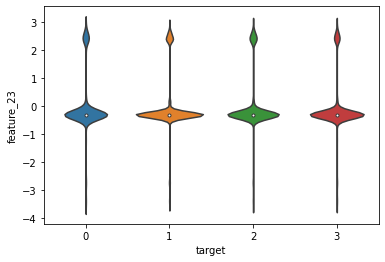

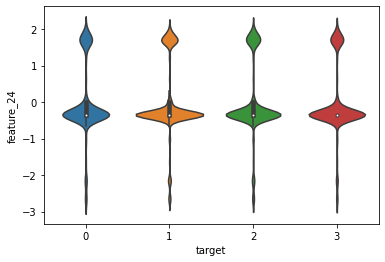

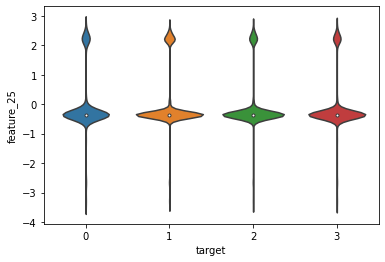

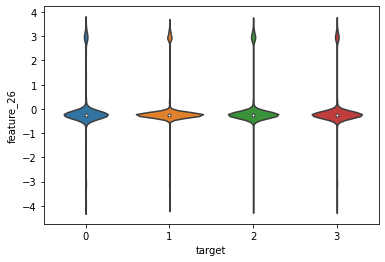

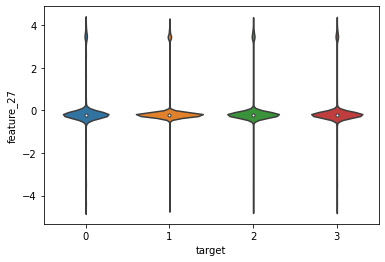

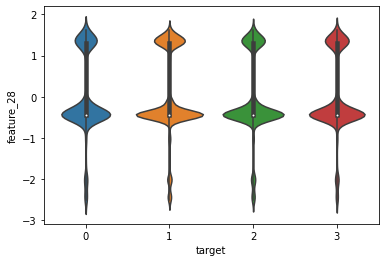

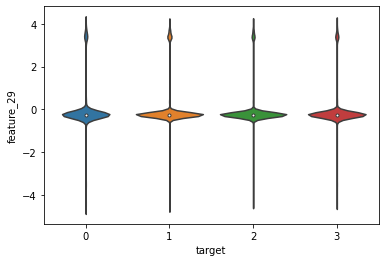

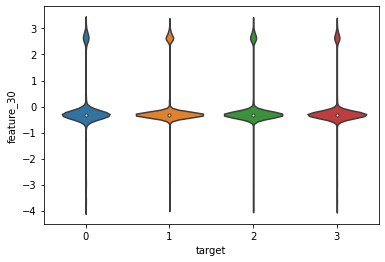

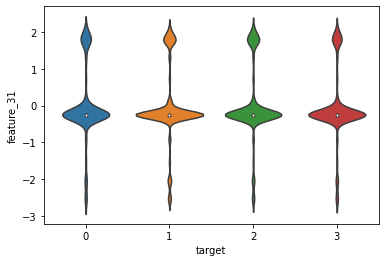

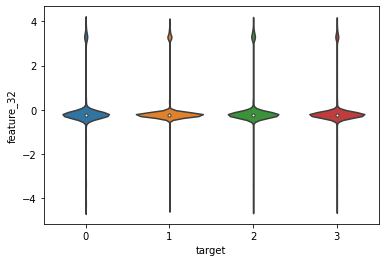

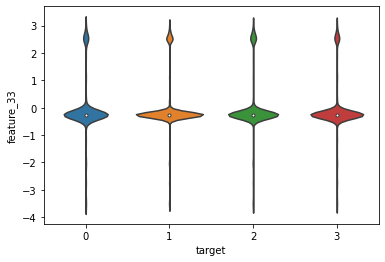

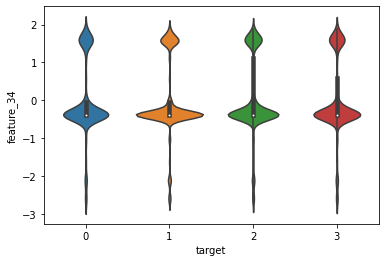

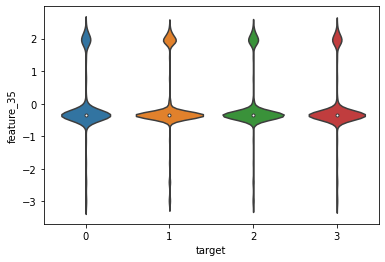

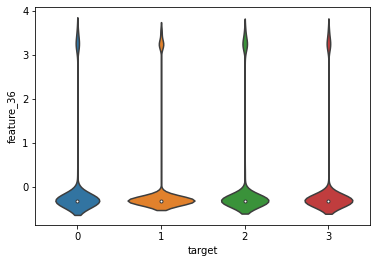

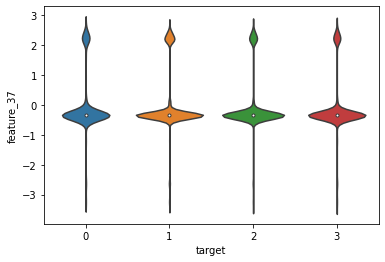

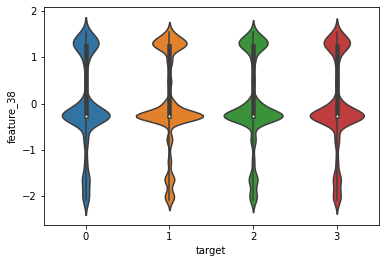

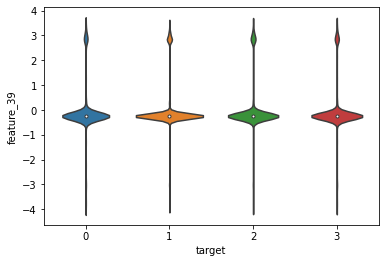

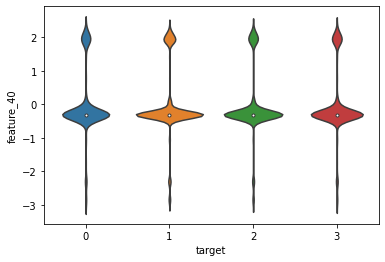

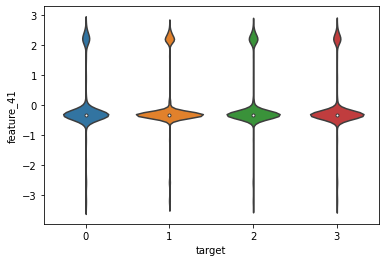

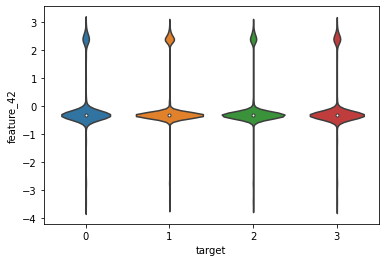

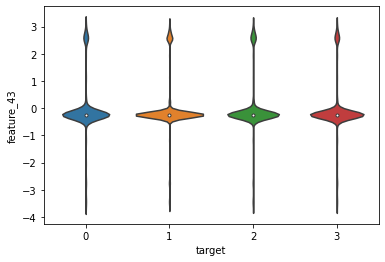

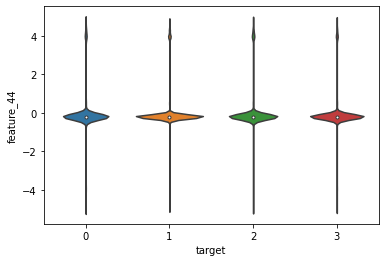

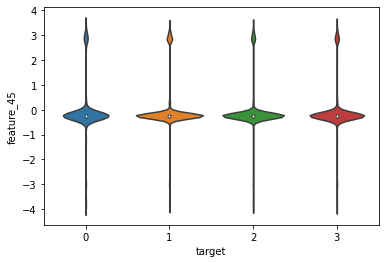

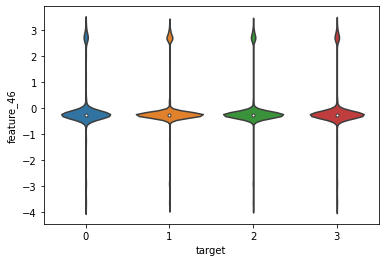

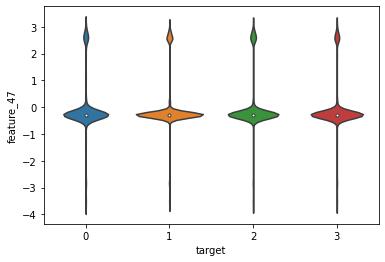

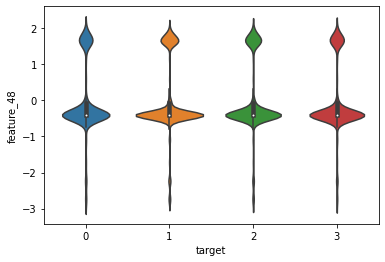

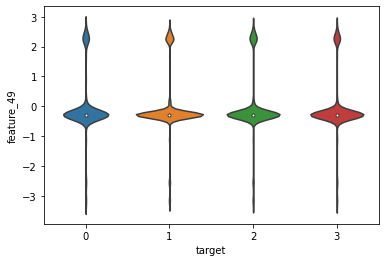

In [171]:
st_feat_val = pd.DataFrame(StandardScaler().fit_transform(np.sin(train_data[features])), columns=features)
st_feat_val[TARGET_NAME] = train_data[TARGET_NAME]
for f in features:
    sns.violinplot(x=TARGET_NAME, y=f, data=st_feat_val)
    plt.show()

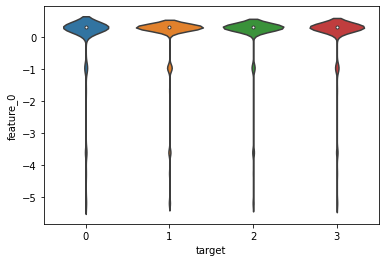

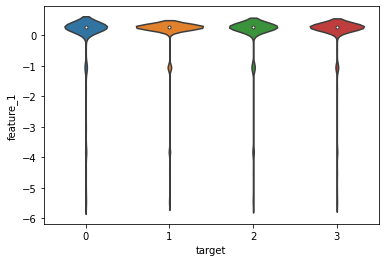

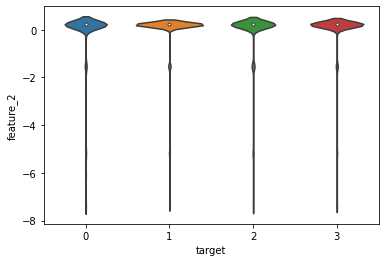

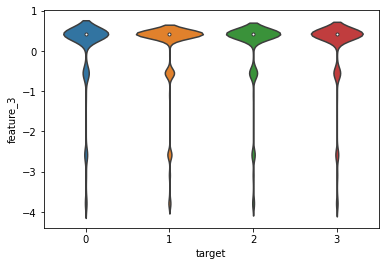

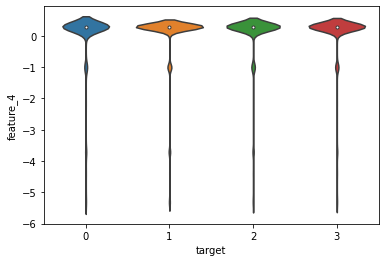

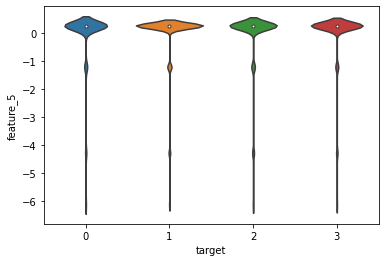

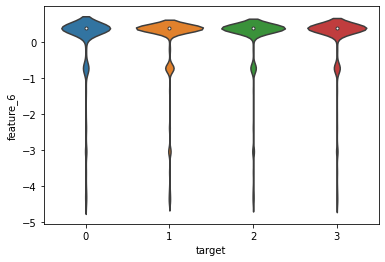

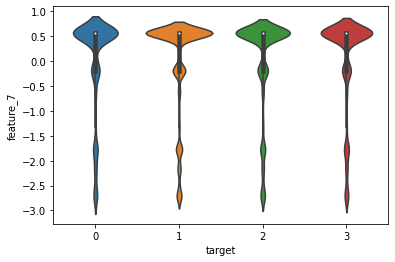

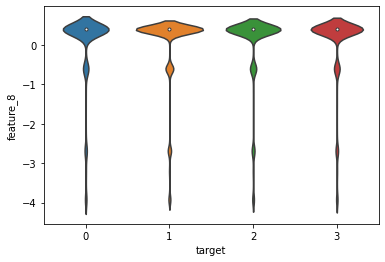

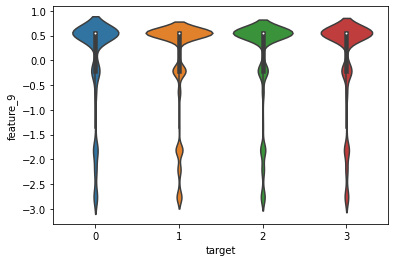

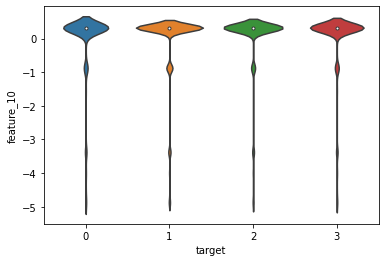

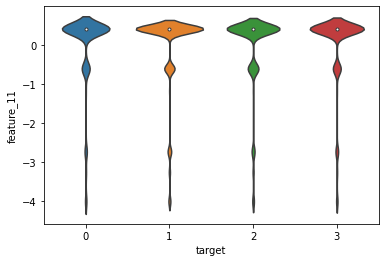

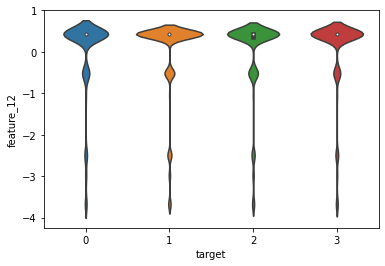

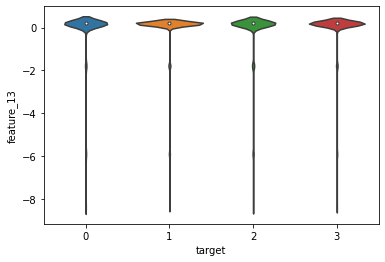

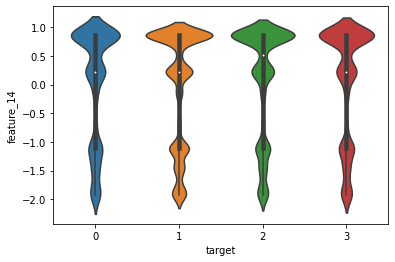

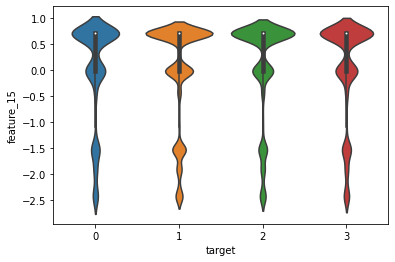

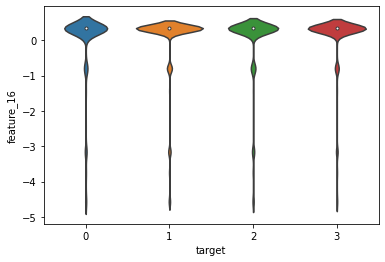

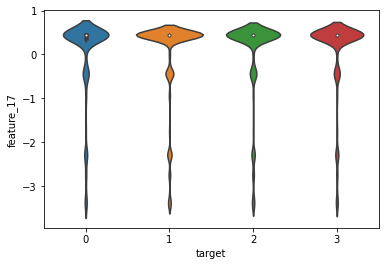

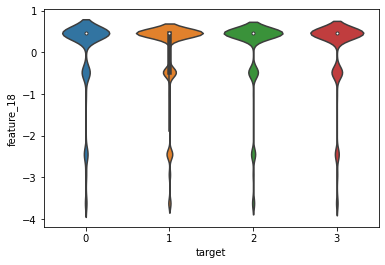

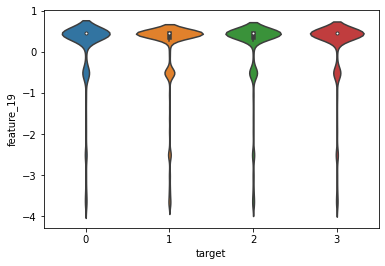

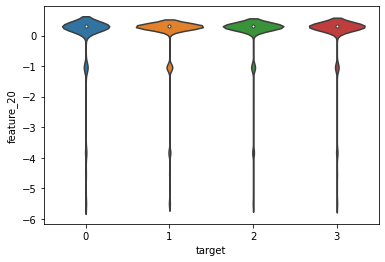

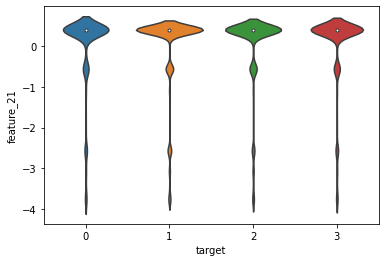

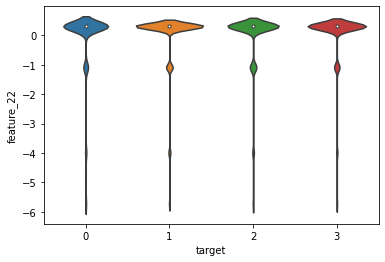

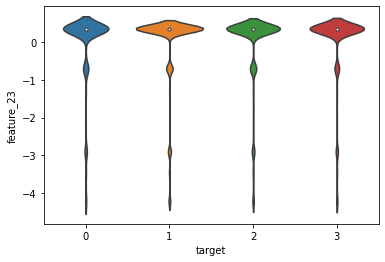

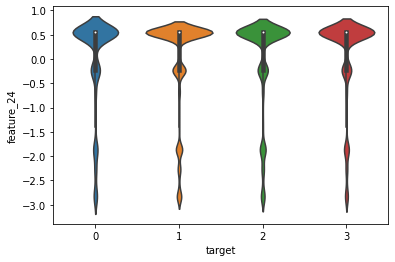

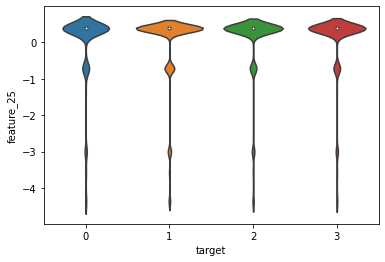

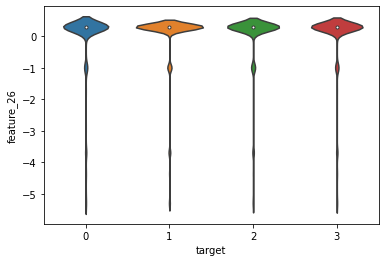

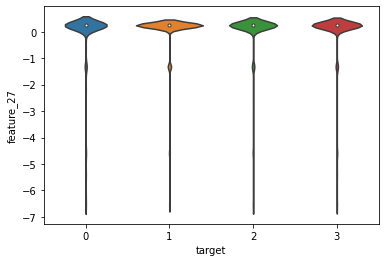

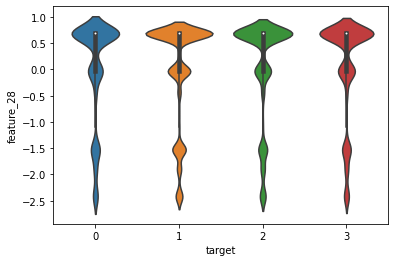

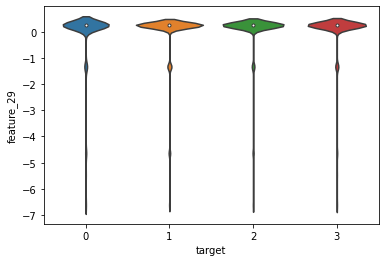

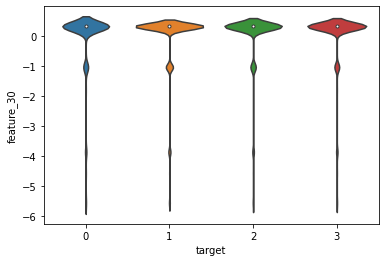

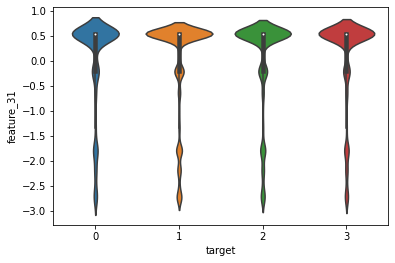

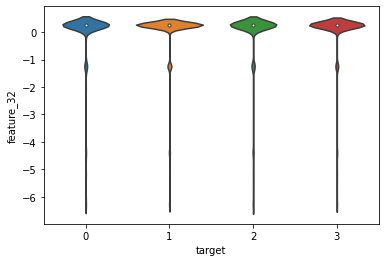

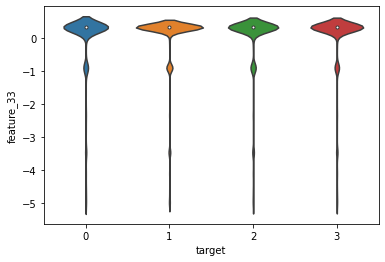

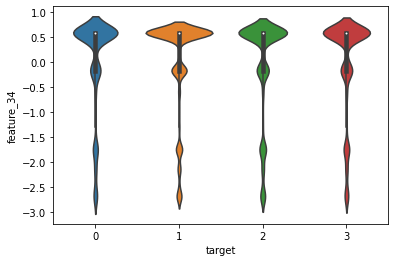

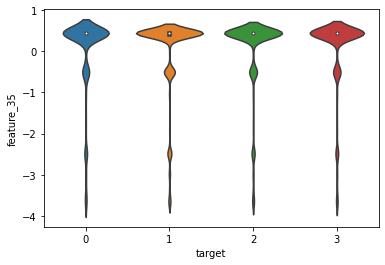

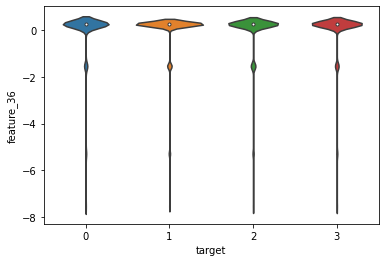

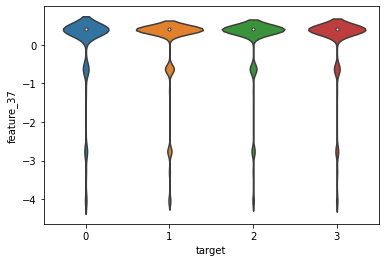

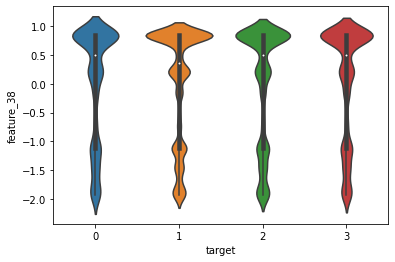

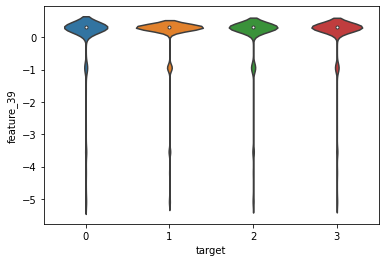

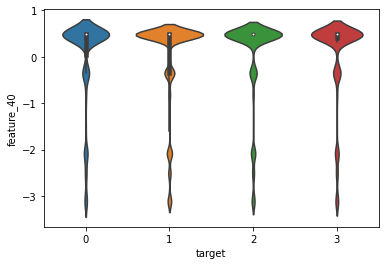

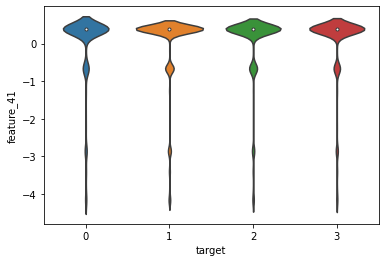

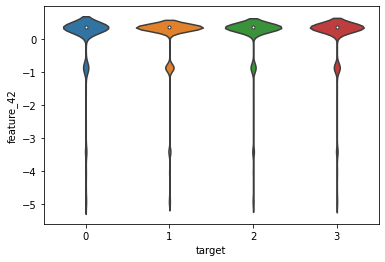

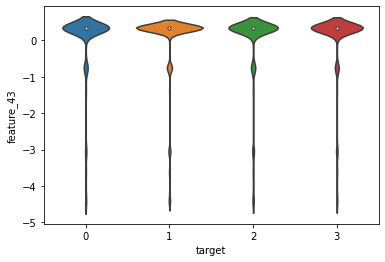

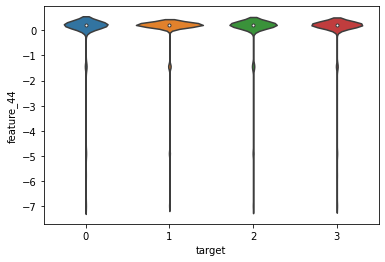

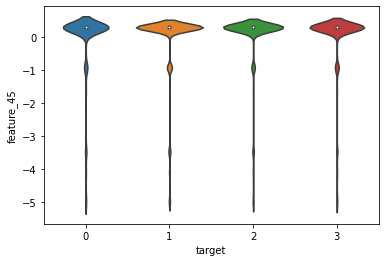

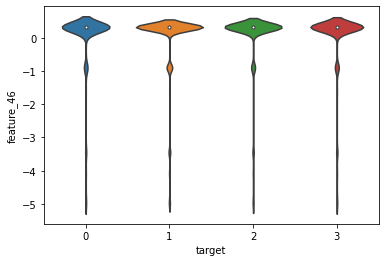

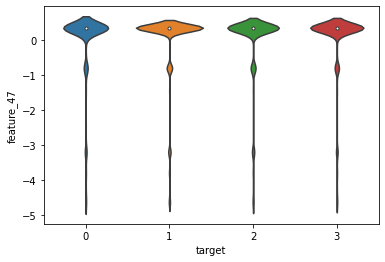

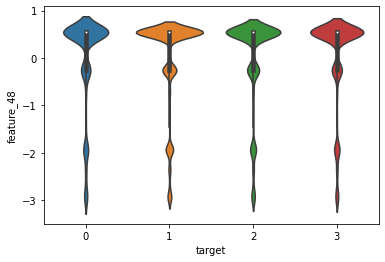

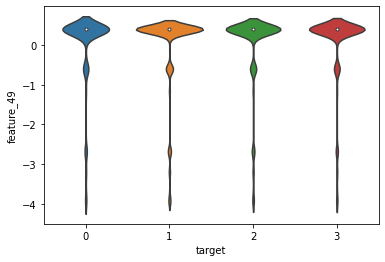

In [172]:
st_feat_val = pd.DataFrame(StandardScaler().fit_transform(np.cos(train_data[features])), columns=features)
st_feat_val[TARGET_NAME] = train_data[TARGET_NAME]
for f in features:
    sns.violinplot(x=TARGET_NAME, y=f, data=st_feat_val)
    plt.show()

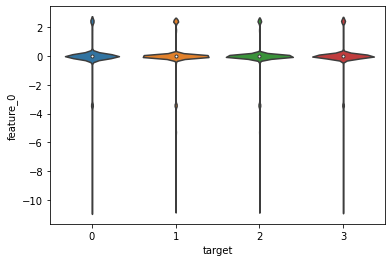

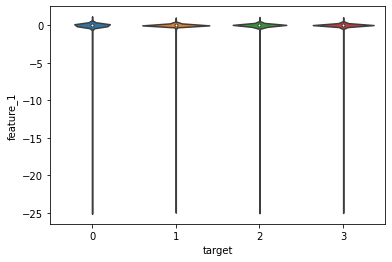

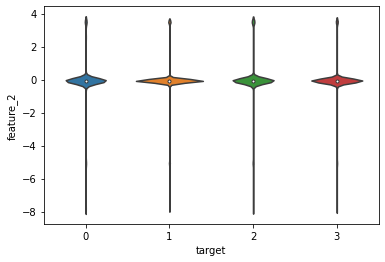

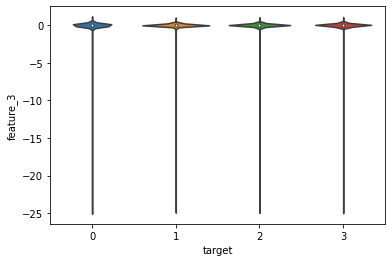

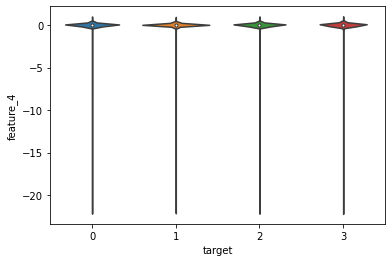

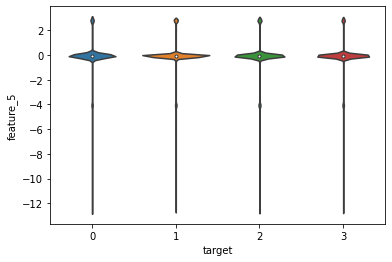

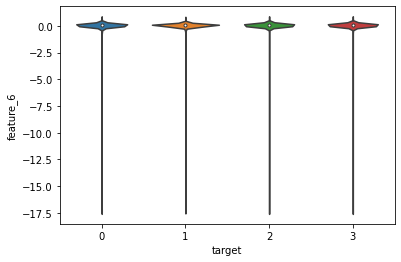

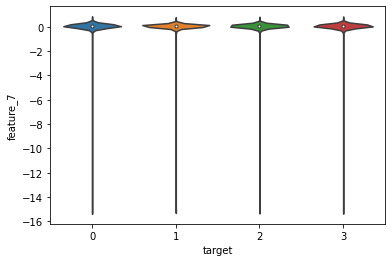

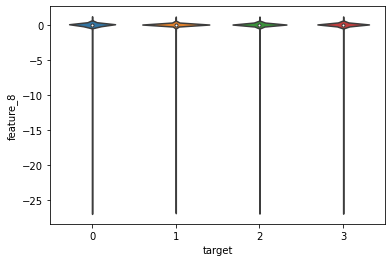

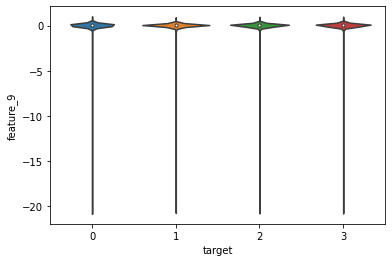

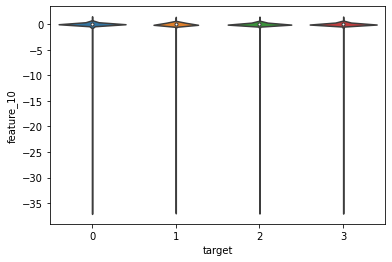

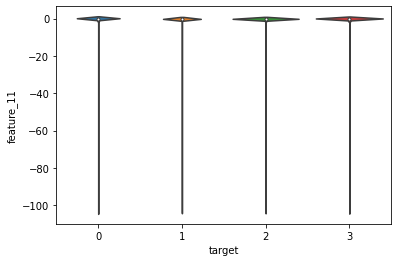

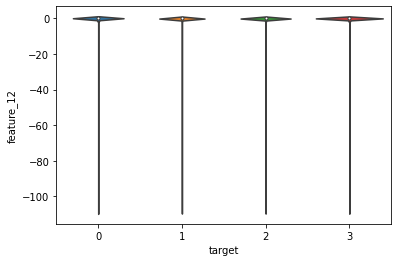

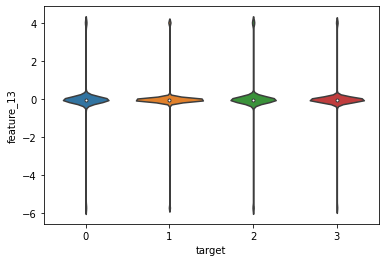

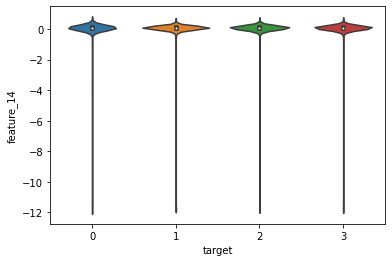

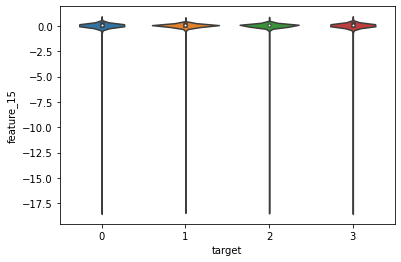

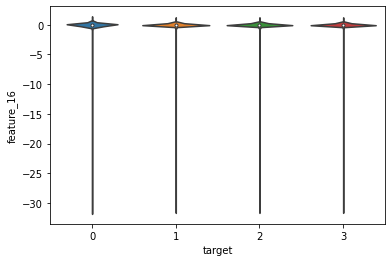

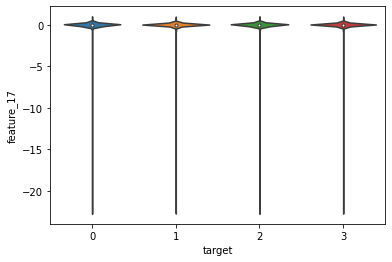

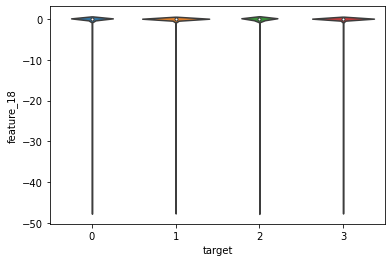

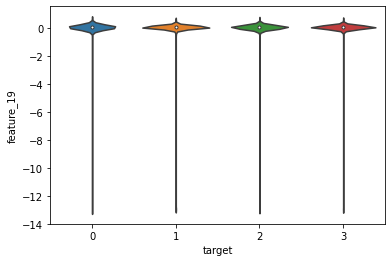

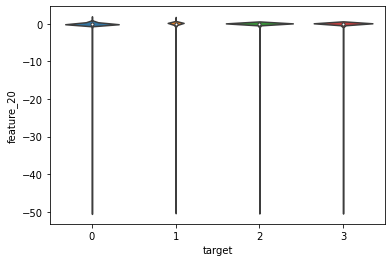

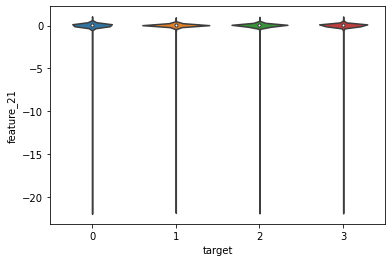

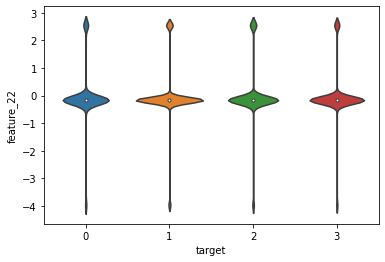

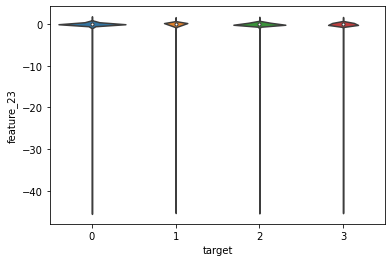

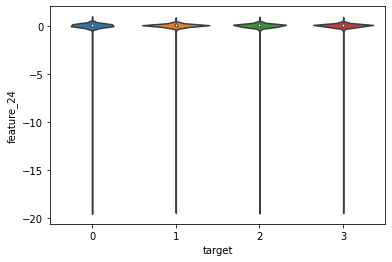

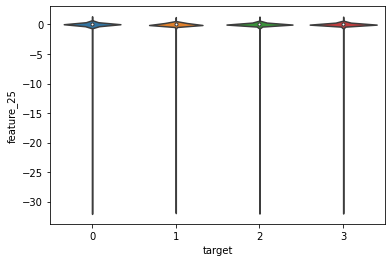

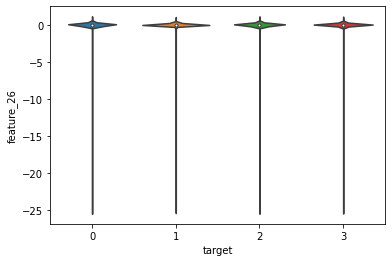

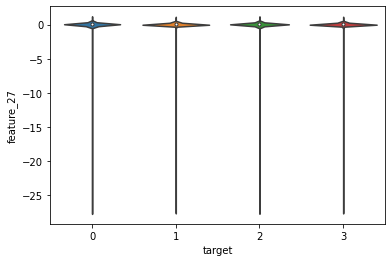

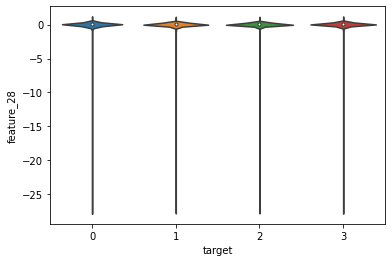

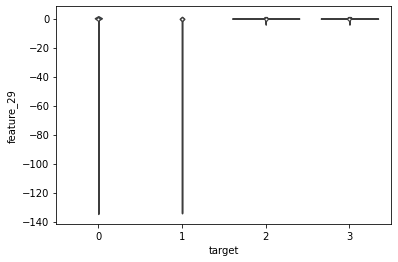

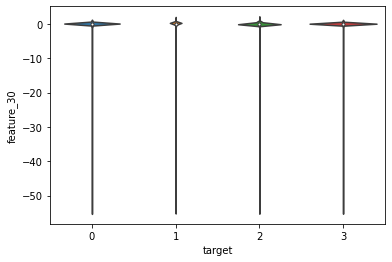

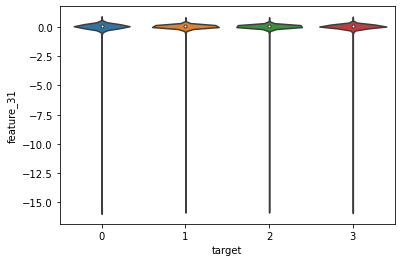

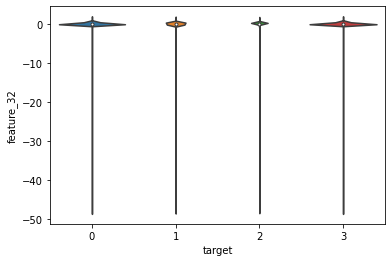

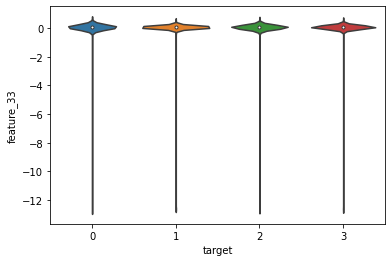

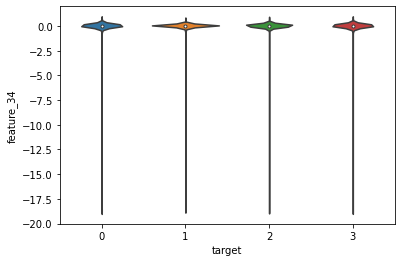

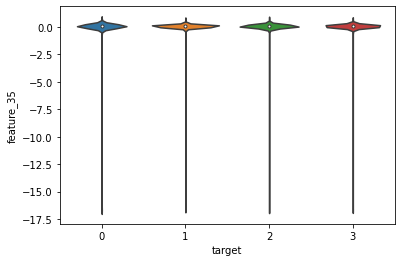

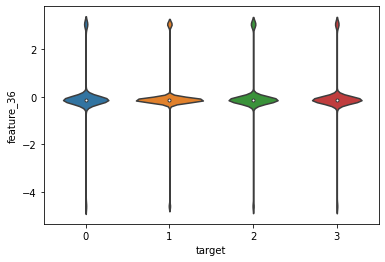

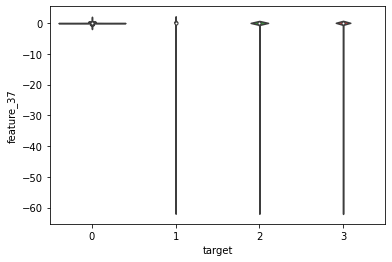

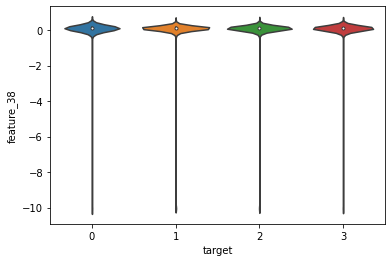

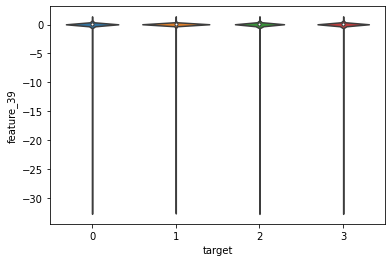

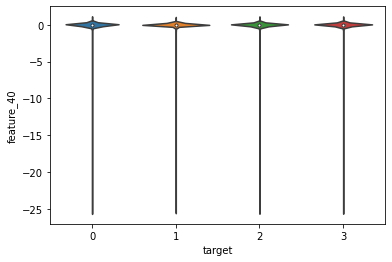

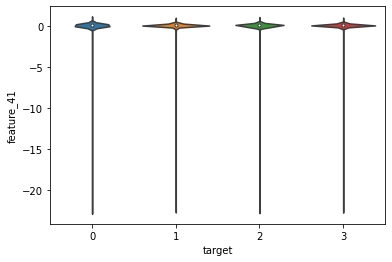

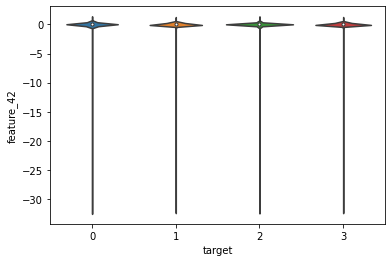

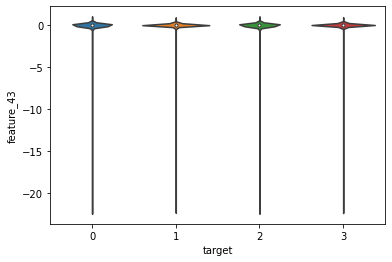

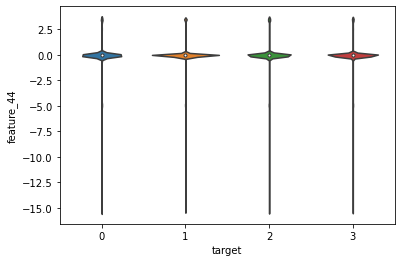

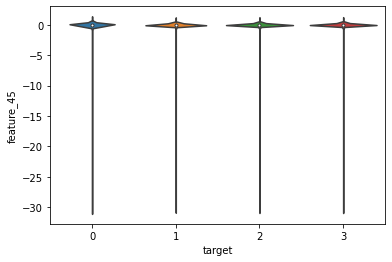

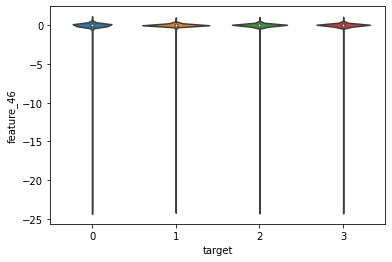

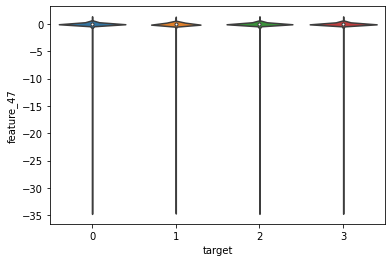

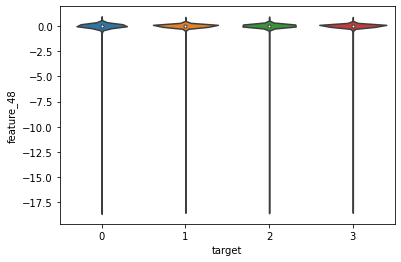

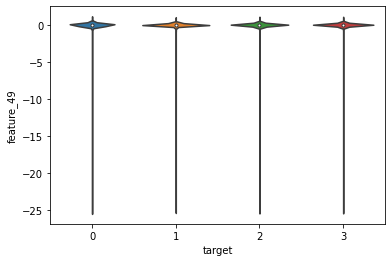

In [176]:
st_feat_val = pd.DataFrame(StandardScaler().fit_transform(np.tan(train_data[features])), columns=features)
st_feat_val[TARGET_NAME] = train_data[TARGET_NAME]
for f in features:
    sns.violinplot(x=TARGET_NAME, y=f, data=st_feat_val)
    plt.show()

### 4. Statistics change in dependence of target
### 4.1 Mean

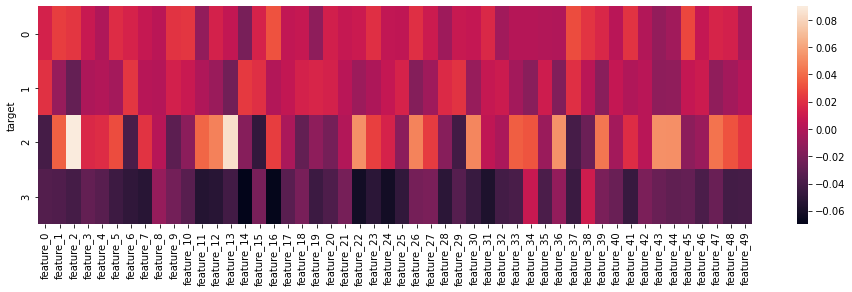

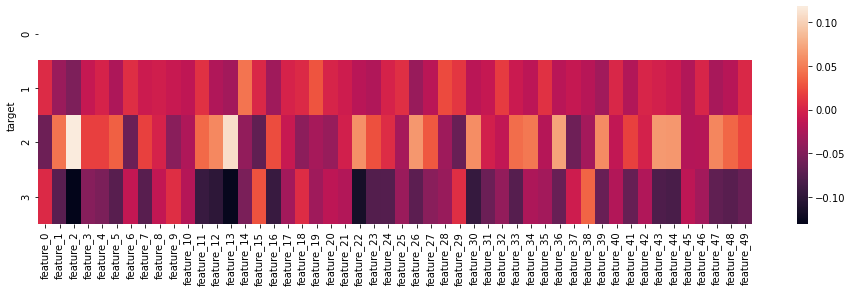

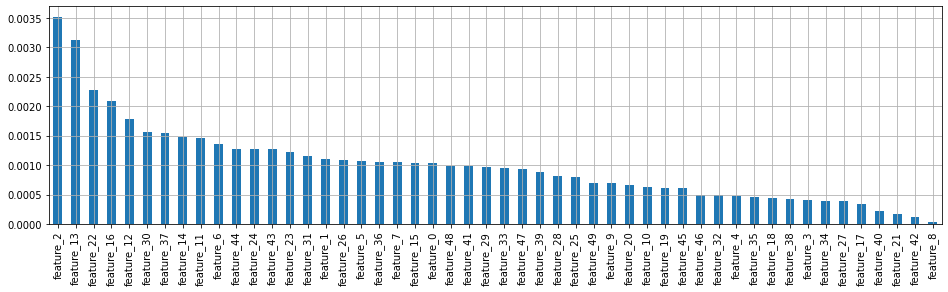

In [71]:
st_feat_val = pd.DataFrame(StandardScaler().fit_transform(train_data[features]), columns=features)
st_feat_val[TARGET_NAME] = train_data[TARGET_NAME]
plt.figure(figsize=(16,4))
sns.heatmap(st_feat_val.groupby([TARGET_NAME])[features].mean())
plt.show()
plt.figure(figsize=(16,4))
sns.heatmap(st_feat_val.groupby([TARGET_NAME])[features].mean().diff(1))
plt.show()

st_feat_val.groupby([TARGET_NAME])[features].mean().var().sort_values(ascending=False).plot(kind='bar', figsize=(16,4))
plt.grid()
plt.show()

### 4.2 Std

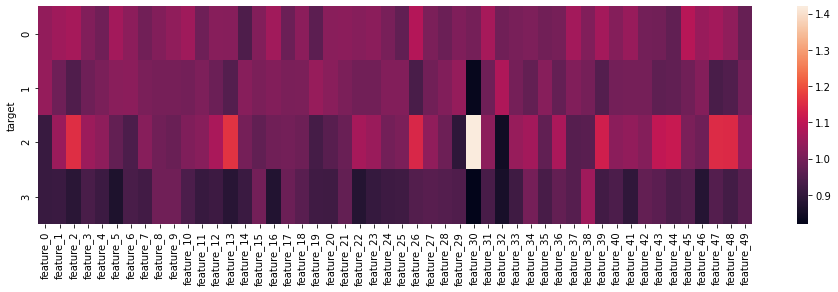

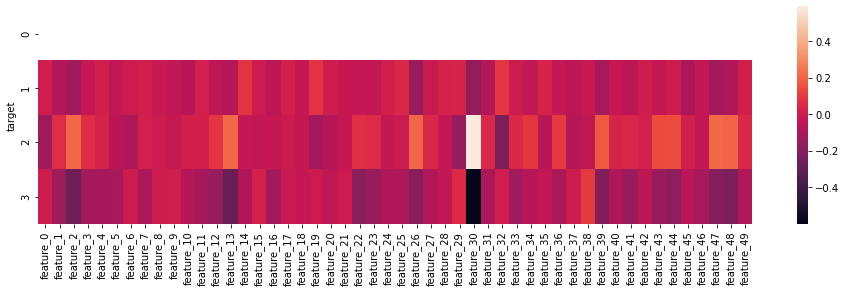

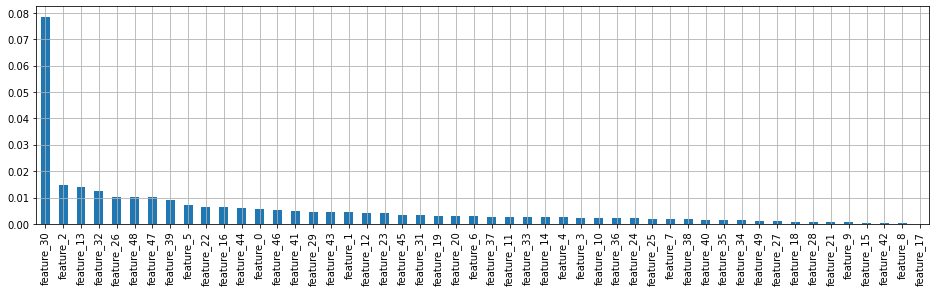

In [74]:
st_feat_val = pd.DataFrame(StandardScaler().fit_transform(train_data[features]), columns=features)
st_feat_val[TARGET_NAME] = train_data[TARGET_NAME]
plt.figure(figsize=(16,4))
sns.heatmap(st_feat_val.groupby([TARGET_NAME])[features].std())
plt.show()

plt.figure(figsize=(16,4))
sns.heatmap(st_feat_val.groupby([TARGET_NAME])[features].std().diff(1))
plt.show()

st_feat_val.groupby([TARGET_NAME])[features].std().var().sort_values(ascending=False).plot(kind='bar', figsize=(16,4))
plt.grid()
plt.show()

### 4.3 Median

In [203]:
st_feat_val = pd.DataFrame(StandardScaler().fit_transform(train_data[features]), columns=features)
st_feat_val[TARGET_NAME] = train_data[TARGET_NAME]
plt.figure(figsize=(16,4))
sns.heatmap(st_feat_val.groupby([TARGET_NAME])[features].agg(['mode']))
plt.show()

# plt.figure(figsize=(16,4))
# sns.heatmap(st_feat_val.groupby([TARGET_NAME])[features].mode().diff(1))
# plt.show()

# st_feat_val.groupby([TARGET_NAME])[features].mode().var().sort_values(ascending=False).plot(kind='bar', 
#                                                                                               figsize=(16,4))
# plt.grid()
# plt.show()

AttributeError: 'SeriesGroupBy' object has no attribute 'mode'

<Figure size 1152x288 with 0 Axes>

### 4.4 Min

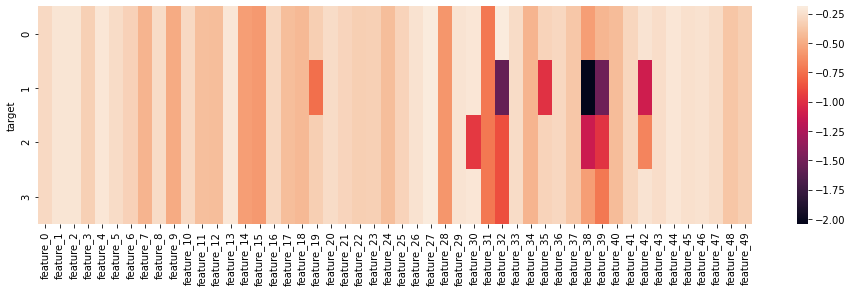

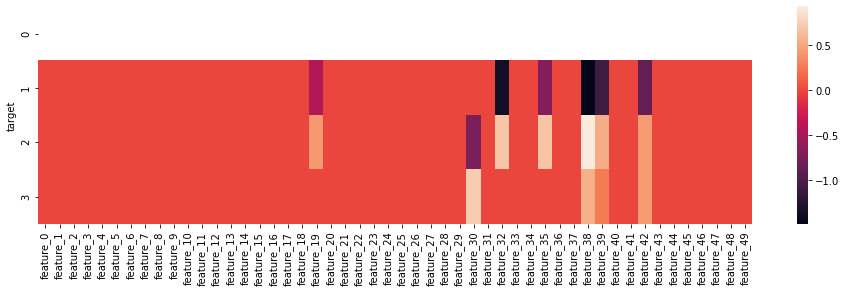

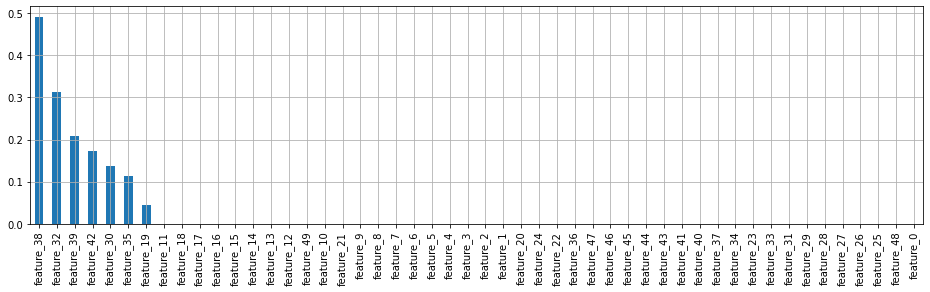

In [96]:
st_feat_val = pd.DataFrame(StandardScaler().fit_transform(train_data[features]), columns=features)
st_feat_val[TARGET_NAME] = train_data[TARGET_NAME]
plt.figure(figsize=(16,4))
sns.heatmap(st_feat_val.groupby([TARGET_NAME])[features].min())
plt.show()

plt.figure(figsize=(16,4))
sns.heatmap(st_feat_val.groupby([TARGET_NAME])[features].min().diff(1))
plt.show()


st_feat_val.groupby([TARGET_NAME])[features].min().var().sort_values(ascending=False).plot(kind='bar', figsize=(16,4))
plt.grid()
plt.show()

### 4.5 Max

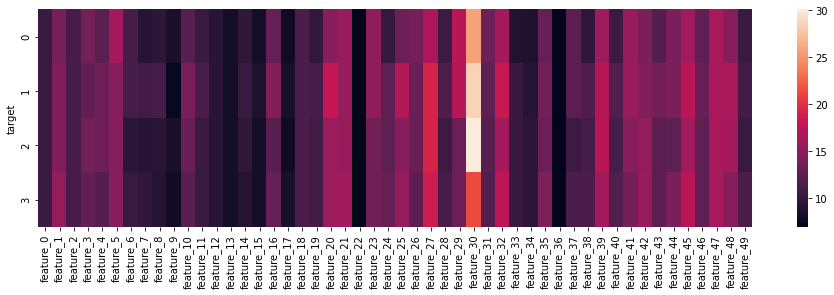

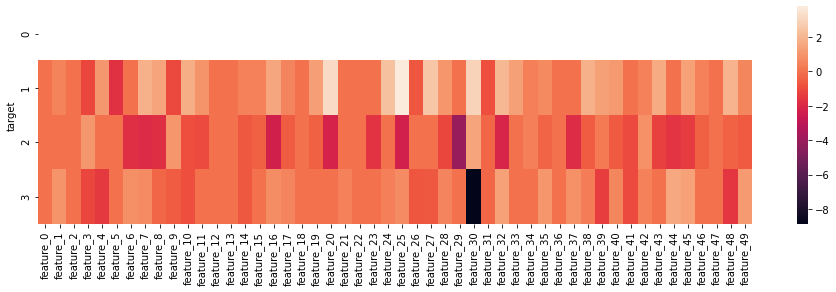

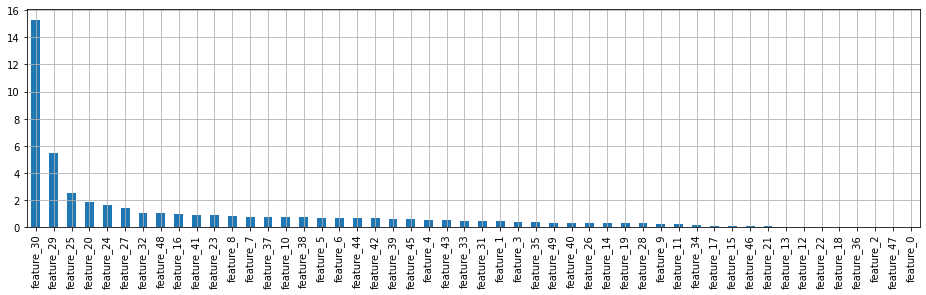

In [73]:
st_feat_val = pd.DataFrame(StandardScaler().fit_transform(train_data[features]), columns=features)
st_feat_val[TARGET_NAME] = train_data[TARGET_NAME]
plt.figure(figsize=(16,4))
sns.heatmap(st_feat_val.groupby([TARGET_NAME])[features].max())
plt.show()

plt.figure(figsize=(16,4))
sns.heatmap(st_feat_val.groupby([TARGET_NAME])[features].max().diff(1))
plt.show()


st_feat_val.groupby([TARGET_NAME])[features].max().var().sort_values(ascending=False).plot(kind='bar', 
                                                                                           figsize=(16,4))
plt.grid()
plt.show()

### 5. PCA feature analisys

In [131]:
pca_features = [f'pca_{f}' for f in features]
pca_train = pd.DataFrame(PCA().fit_transform(train_data[features]), columns=pca_features)

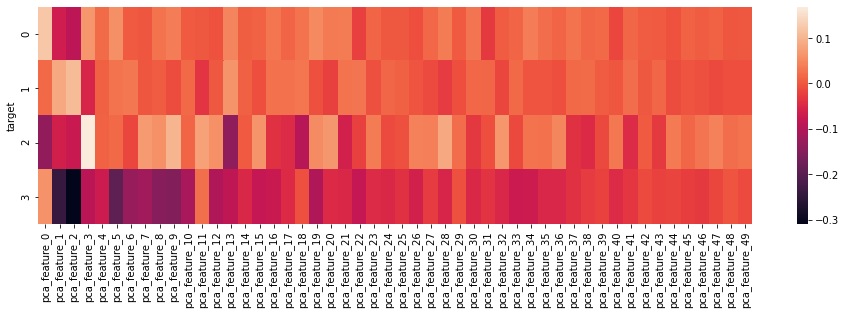

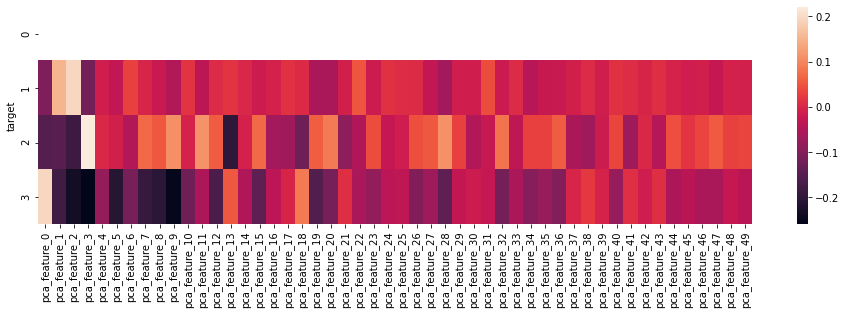

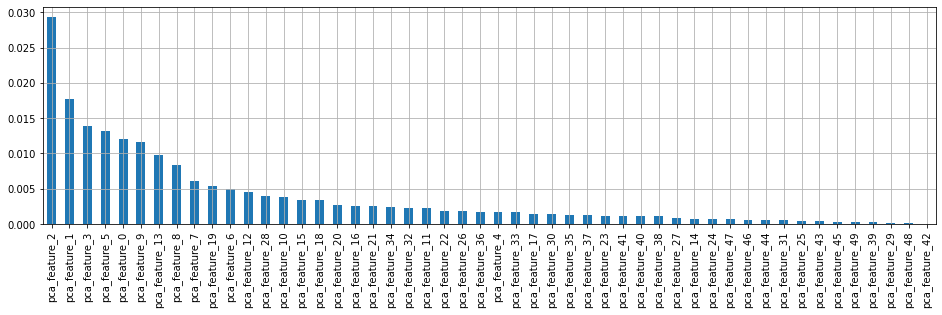

In [132]:
pca_train[TARGET_NAME] = train_data[TARGET_NAME]
plt.figure(figsize=(16,4))
sns.heatmap(pca_train.groupby([TARGET_NAME])[pca_features].mean())
plt.show()
plt.figure(figsize=(16,4))
sns.heatmap(pca_train.groupby([TARGET_NAME])[pca_features].mean().diff(1))
plt.show()

pca_train.groupby([TARGET_NAME])[pca_features].mean().var().sort_values(ascending=False).plot(kind='bar', figsize=(16,4))
plt.grid()
plt.show()

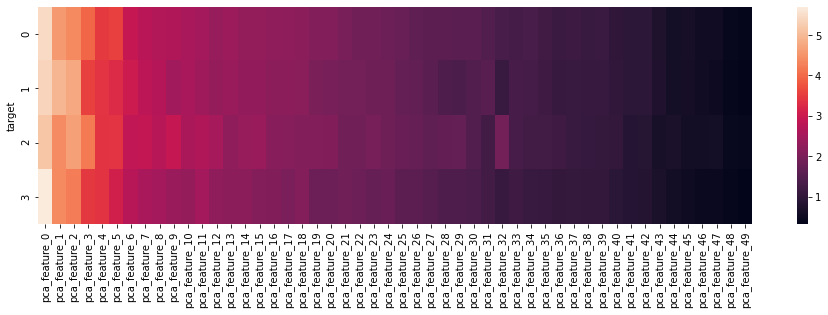

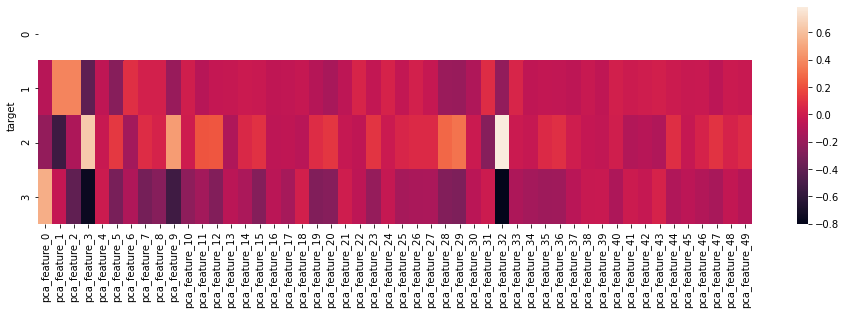

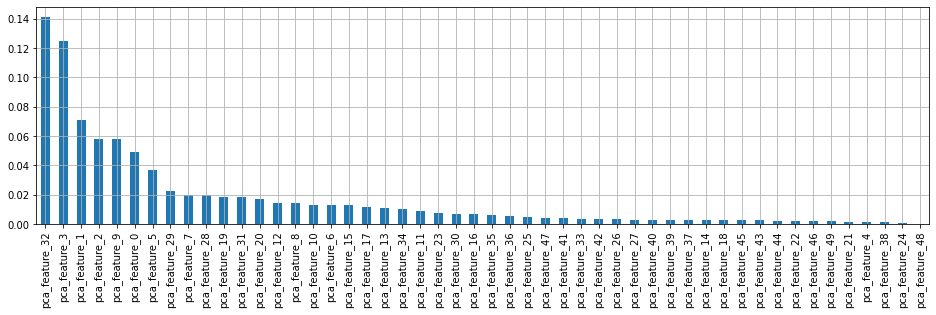

In [133]:
pca_train[TARGET_NAME] = train_data[TARGET_NAME]
plt.figure(figsize=(16,4))
sns.heatmap(pca_train.groupby([TARGET_NAME])[pca_features].std())
plt.show()
plt.figure(figsize=(16,4))
sns.heatmap(pca_train.groupby([TARGET_NAME])[pca_features].std().diff(1))
plt.show()

pca_train.groupby([TARGET_NAME])[pca_features].std().var().sort_values(ascending=False).plot(kind='bar', figsize=(16,4))
plt.grid()
plt.show()

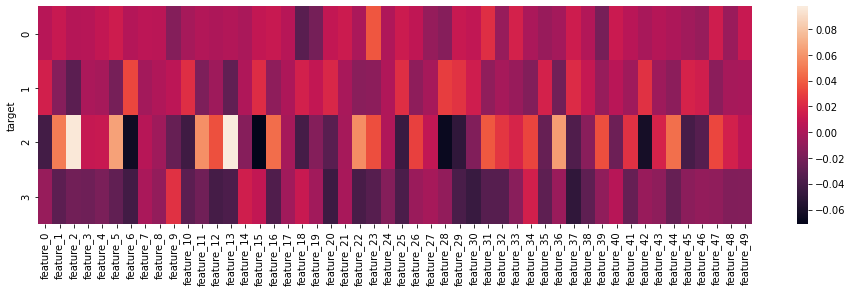

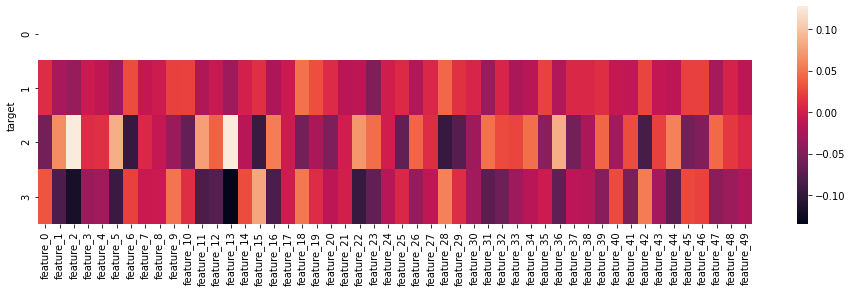

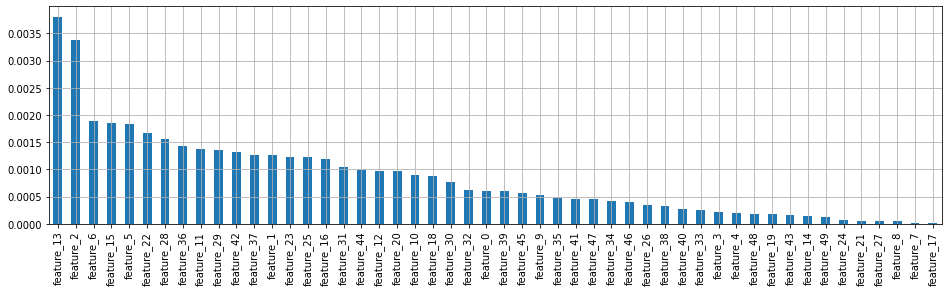

In [168]:
st_feat_val = pd.DataFrame(StandardScaler().fit_transform(np.sin(train_data[features])), columns=features)
st_feat_val[TARGET_NAME] = train_data[TARGET_NAME]
plt.figure(figsize=(16,4))
sns.heatmap(st_feat_val.groupby([TARGET_NAME])[features].mean())
plt.show()
plt.figure(figsize=(16,4))
sns.heatmap(st_feat_val.groupby([TARGET_NAME])[features].mean().diff(1))
plt.show()

st_feat_val.groupby([TARGET_NAME])[features].mean().var().sort_values(ascending=False).plot(kind='bar', figsize=(16,4))
plt.grid()
plt.show()

### 5.2 Hierarchical analisys

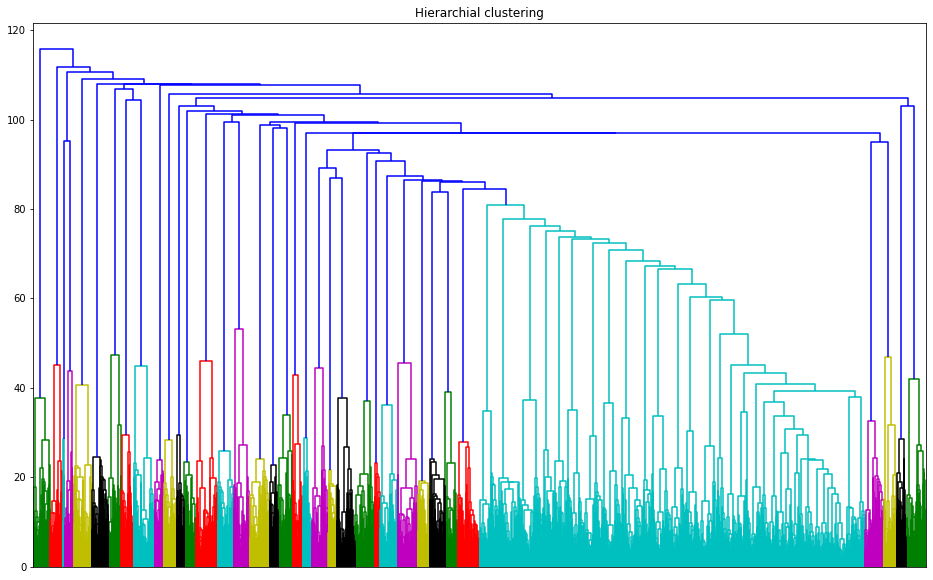

In [192]:
st_feat_val = pd.DataFrame(StandardScaler().fit_transform(train_data[features]), columns=features).sample(10000)
linked = linkage(st_feat_val, method = 'ward')

plt.figure(figsize=(16, 10))  
dendrogram(linked,
            orientation='top')
plt.title('Hierarchial clustering' )
plt.xticks([])
plt.show()

In [198]:
X_sc = StandardScaler().fit_transform(train_data[features])
tsne = TSNE(n_components=2, perplexity=perp)
X_tsne = tsne.fit_transform(X_sc)

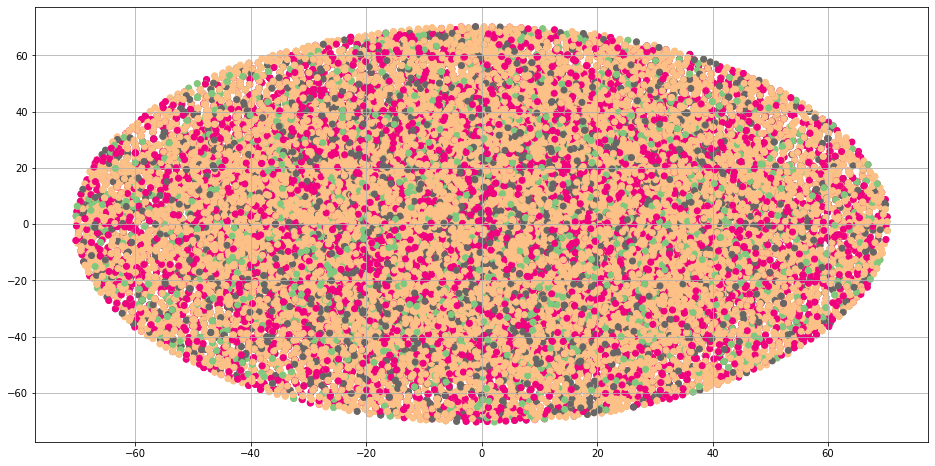

In [200]:
plt.figure(figsize=(16,8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=train_data[TARGET_NAME], cmap='Accent')
plt.grid()

plt.show()

### 6. Explore combinations of features

In [152]:
pair_feat = [c for c in itertools.combinations(features, 2)]

In [154]:
%%time
pair_data = train_data.copy()
for pair in pair_feat:
    pair_data[pair[0] + '*' + pair[1]]  = pair_data[pair[0]] * pair_data[pair[1]]
    pair_data[pair[0] + '-' + pair[1]]  = pair_data[pair[0]] - pair_data[pair[1]]
    pair_data[pair[0] + '+' + pair[1]]  = pair_data[pair[0]] + pair_data[pair[1]]

CPU times: user 23 s, sys: 47.2 s, total: 1min 10s
Wall time: 1min 8s


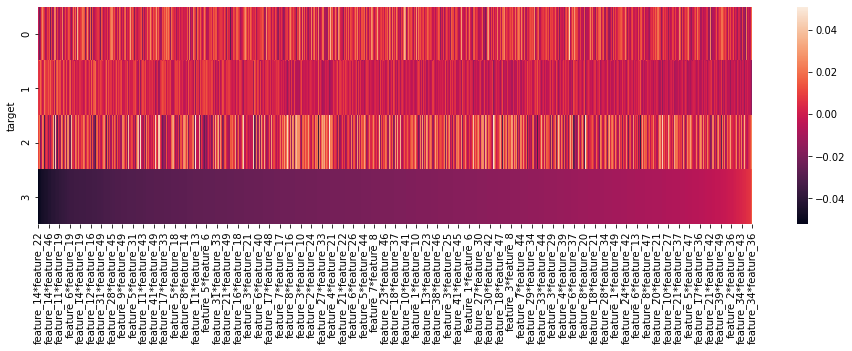

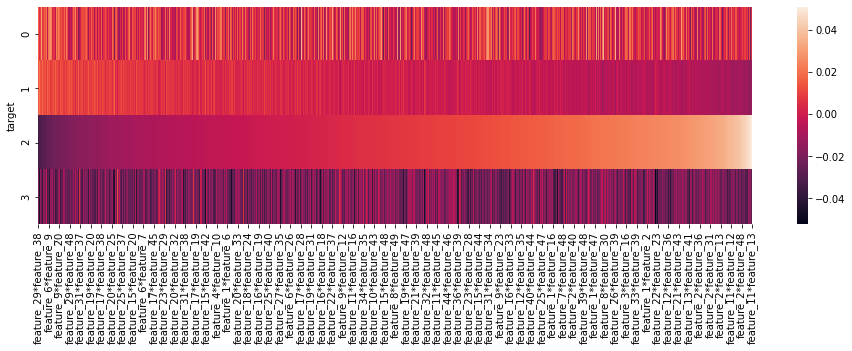

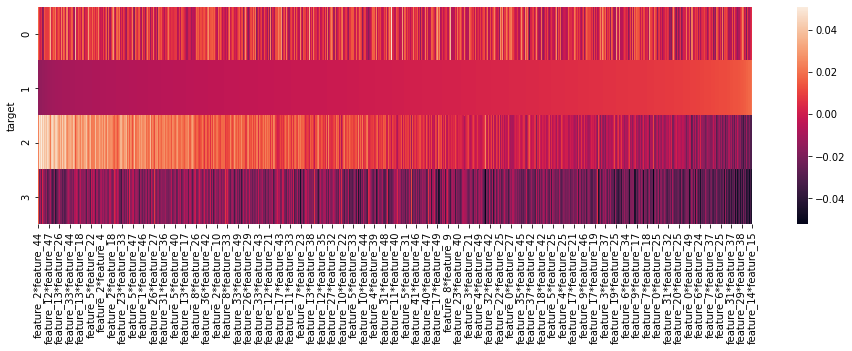

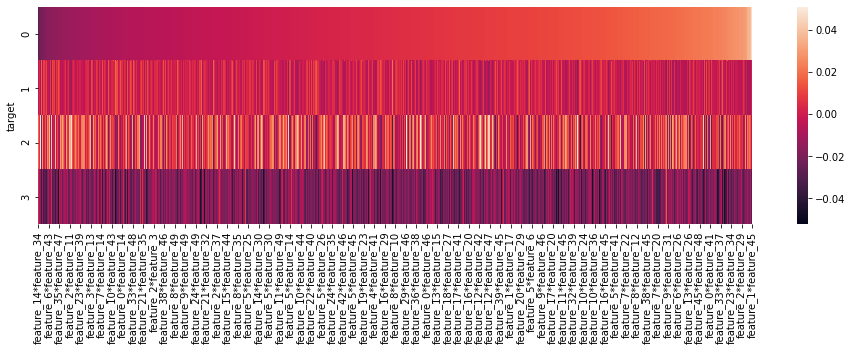

In [164]:
filter_feat = pair_data.filter(like='*').columns
st_feat_val = pd.DataFrame(StandardScaler().fit_transform(pair_data[filter_feat]), columns=filter_feat)
st_feat_val[TARGET_NAME] = train_data[TARGET_NAME]
plt.figure(figsize=(16,4))
sns.heatmap(st_feat_val.groupby([TARGET_NAME])[filter_feat].mean().sort_values(3, axis=1))
plt.show()
plt.figure(figsize=(16,4))
sns.heatmap(st_feat_val.groupby([TARGET_NAME])[filter_feat].mean().sort_values(2, axis=1))
plt.show()
plt.figure(figsize=(16,4))
sns.heatmap(st_feat_val.groupby([TARGET_NAME])[filter_feat].mean().sort_values(1, axis=1))
plt.show()
plt.figure(figsize=(16,4))
sns.heatmap(st_feat_val.groupby([TARGET_NAME])[filter_feat].mean().sort_values(0, axis=1))
plt.show()

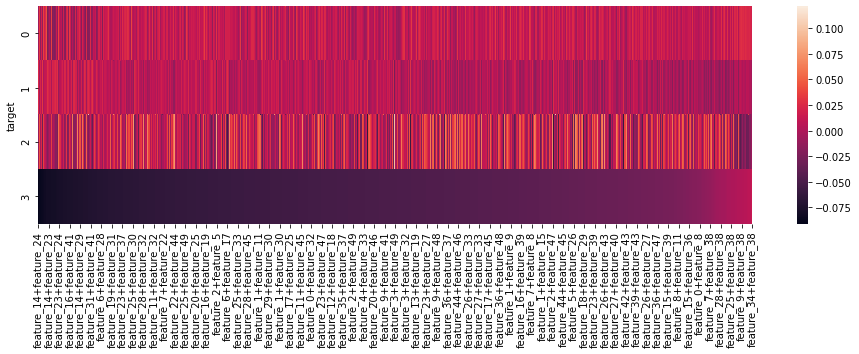

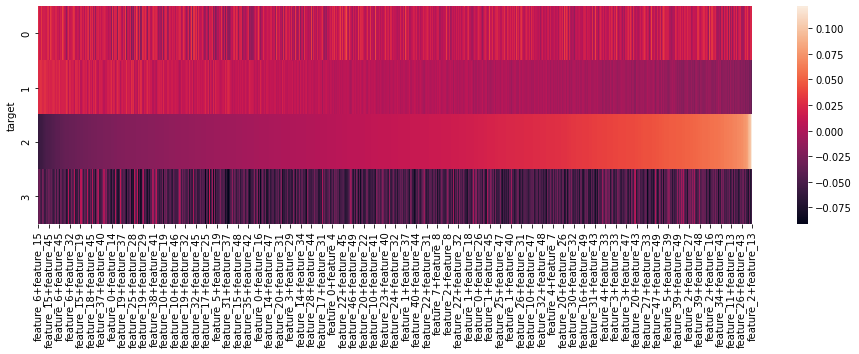

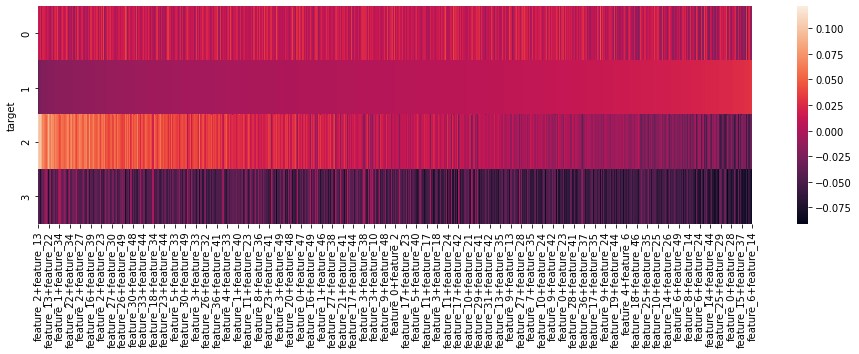

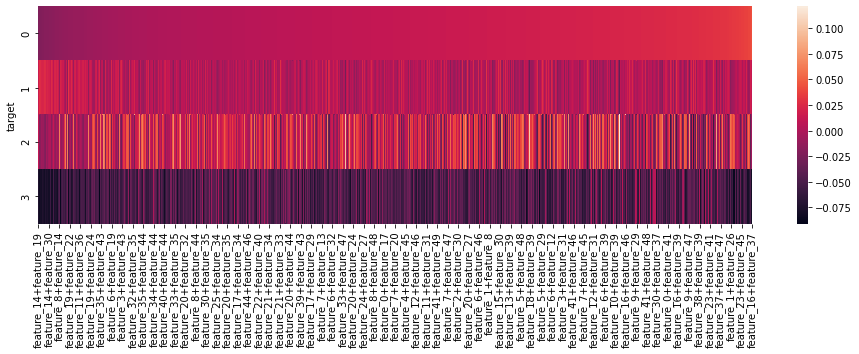

In [166]:
filter_feat = pair_data.filter(like='+').columns
st_feat_val = pd.DataFrame(StandardScaler().fit_transform(pair_data[filter_feat]), columns=filter_feat)
st_feat_val[TARGET_NAME] = train_data[TARGET_NAME]
plt.figure(figsize=(16,4))
sns.heatmap(st_feat_val.groupby([TARGET_NAME])[filter_feat].mean().sort_values(3, axis=1))
plt.show()
plt.figure(figsize=(16,4))
sns.heatmap(st_feat_val.groupby([TARGET_NAME])[filter_feat].mean().sort_values(2, axis=1))
plt.show()
plt.figure(figsize=(16,4))
sns.heatmap(st_feat_val.groupby([TARGET_NAME])[filter_feat].mean().sort_values(1, axis=1))
plt.show()
plt.figure(figsize=(16,4))
sns.heatmap(st_feat_val.groupby([TARGET_NAME])[filter_feat].mean().sort_values(0, axis=1))
plt.show()

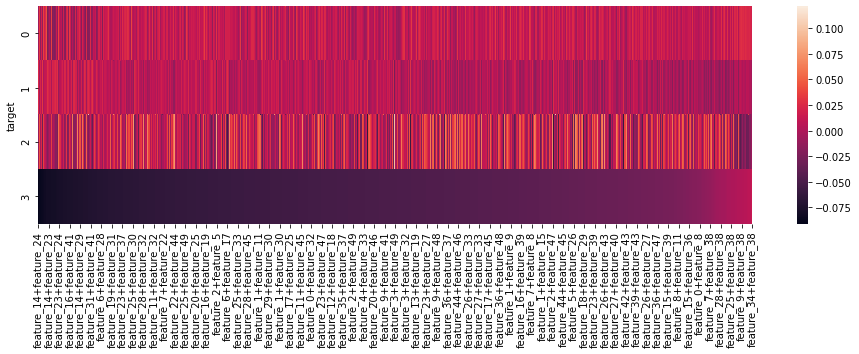

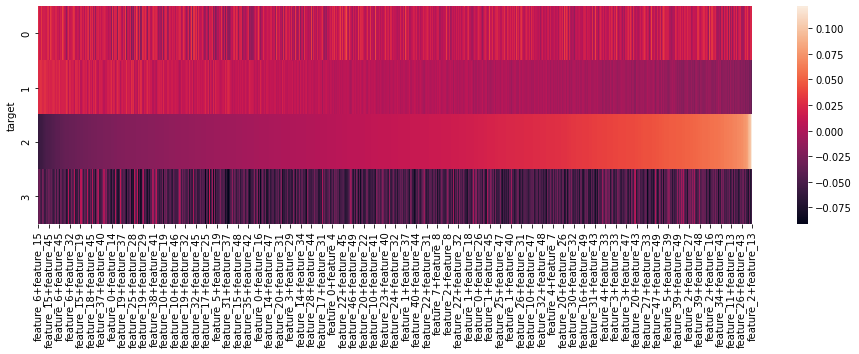

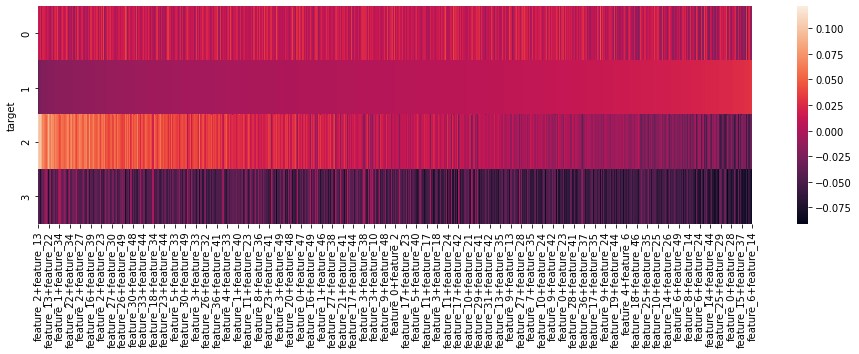

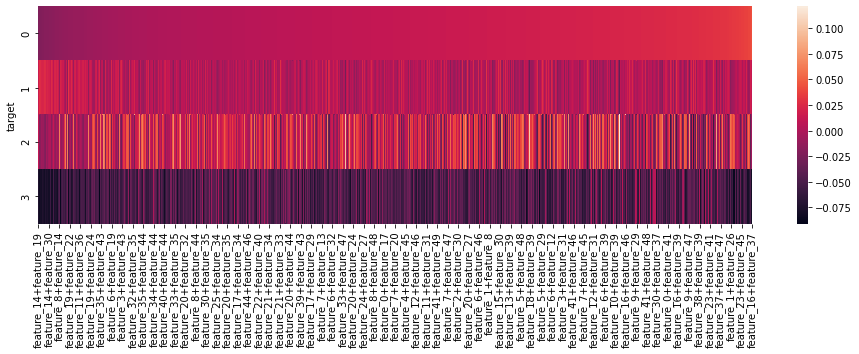

In [167]:
filter_feat = pair_data.filter(like='+').columns
st_feat_val = pd.DataFrame(StandardScaler().fit_transform(pair_data[filter_feat]), columns=filter_feat)
st_feat_val[TARGET_NAME] = train_data[TARGET_NAME]
plt.figure(figsize=(16,4))
sns.heatmap(st_feat_val.groupby([TARGET_NAME])[filter_feat].mean().sort_values(3, axis=1))
plt.show()
plt.figure(figsize=(16,4))
sns.heatmap(st_feat_val.groupby([TARGET_NAME])[filter_feat].mean().sort_values(2, axis=1))
plt.show()
plt.figure(figsize=(16,4))
sns.heatmap(st_feat_val.groupby([TARGET_NAME])[filter_feat].mean().sort_values(1, axis=1))
plt.show()
plt.figure(figsize=(16,4))
sns.heatmap(st_feat_val.groupby([TARGET_NAME])[filter_feat].mean().sort_values(0, axis=1))
plt.show()

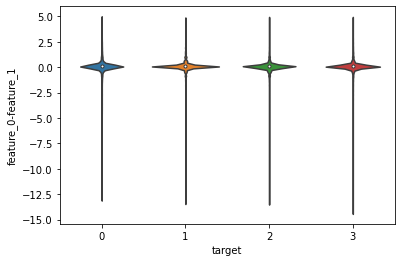

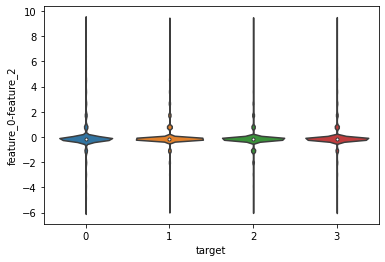

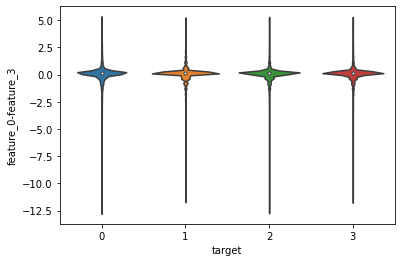

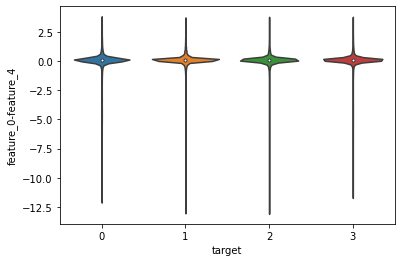

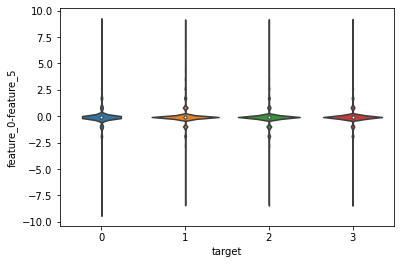

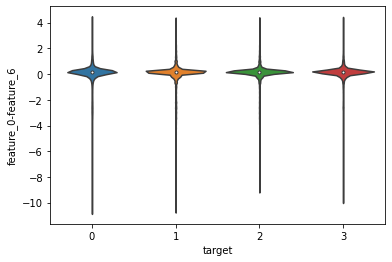

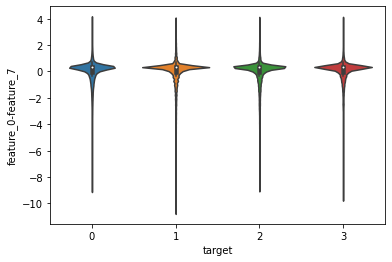

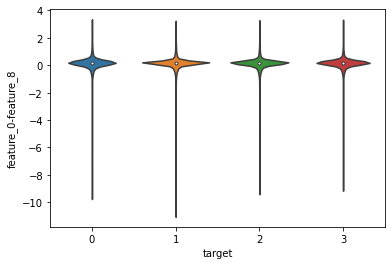

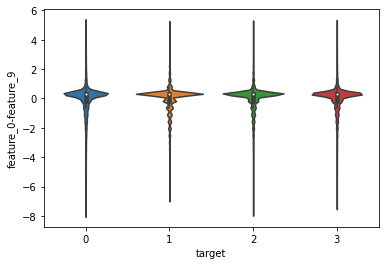

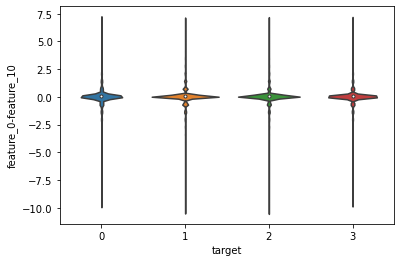

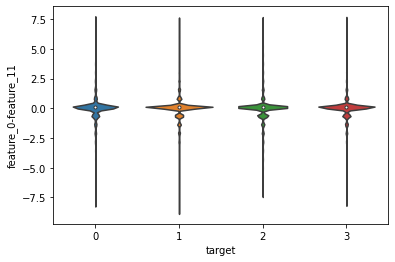

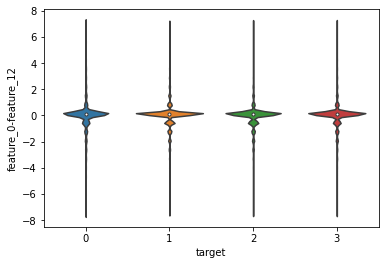

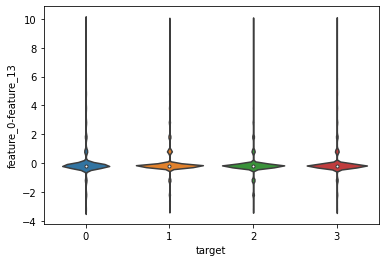

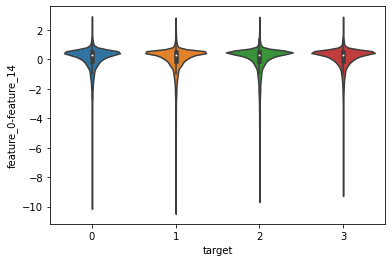

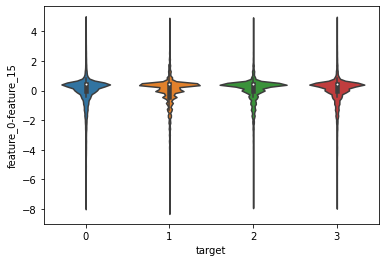

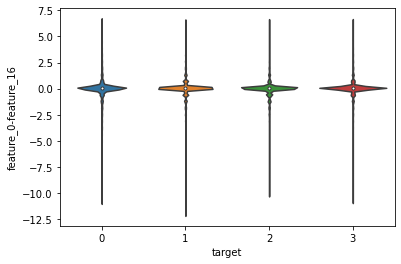

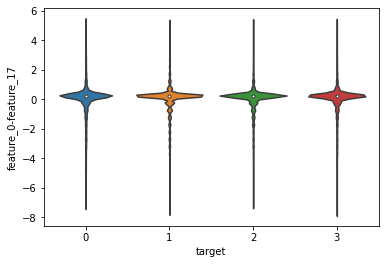

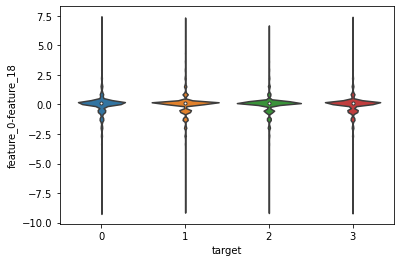

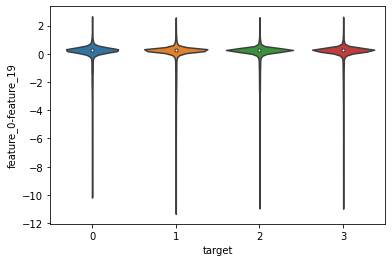

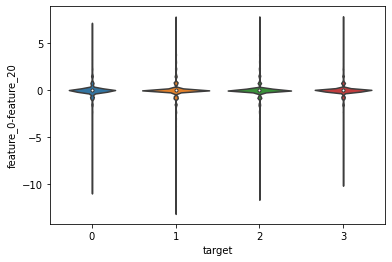

In [184]:
filter_feat = pair_data.filter(like='-').columns
st_feat_val = pd.DataFrame(StandardScaler().fit_transform((pair_data[filter_feat])), columns=filter_feat)
st_feat_val[TARGET_NAME] = train_data[TARGET_NAME]
for f in filter_feat[:20]:
    sns.violinplot(x=TARGET_NAME, y=f, data=st_feat_val)
    plt.show()

## 4. Generate features
1. Main idea - than groupped statistic less differ from observation value 

In [121]:
mean_feat = [f'feature_{f}' for f in [2, 13, 22, 16]]
min_feat = [f'feature_{f}' for f in [38, 32, 39, 42, 30, 35, 19]]
max_feat = [f'feature_{f}' for f in [30, 29, 25]]
std_feat = [f'feature_{f}' for f in [30, 2, 13, 32, 26]]

def get_deviation(train, test, f, stat):
    refer_values = train.groupby([TARGET_NAME]).agg({f:stat}).T
    return pd.DataFrame(test[[f]].values - refer_values.values,
                columns=[f'dev_{f}_{stat}_{target}' for target in refer_values.columns])


In [120]:
# %%time
# frames = []
# for f in mean_feat:
#     frames.append(get_deviation(train_data, train_data, f, 'mean'))
# for f in min_feat:
#     frames.append(get_deviation(train_data, train_data, f, 'min'))
# for f in max_feat:
#     frames.append(get_deviation(train_data, train_data, f, 'max'))
# for f in std_feat:
#     frames.append(get_deviation(train_data, train_data, f, 'std'))    
    
# frames.append(train_data)
# train_data = pd.concat(frames, axis=1)   

## 5. Modeling

In [229]:
def confusion_matrix_plot(y_valid, y_pred, class_names):
    conf_mat = pd.DataFrame(confusion_matrix(y_valid, y_pred), index=class_names, 
                            columns=class_names)
                            
    conf_mat = conf_mat.div(conf_mat.sum(axis=1), axis=0)             
    plt.figure(figsize=(8,8))
    sns.heatmap(conf_mat, annot=True, fmt='.1%', vmax=0.5)
    plt.show()

In [207]:
random_state = 42

In [208]:
X = train_data.drop(columns=['id', TARGET_NAME])
y = train_data[TARGET_NAME]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_state)

In [223]:
%%time
tree = DecisionTreeClassifier(max_depth=20, min_samples_leaf=10, class_weight='balanced', random_state=random_state)
tree.fit(X_train, y_train)


CPU times: user 605 ms, sys: 797 µs, total: 606 ms
Wall time: 605 ms


F1 score train: 0.3271705192043081
LogLoss score train: 1.1992851923105372
F1 score test: 0.21895378313984734
LogLoss score test: 3.2761050808317016


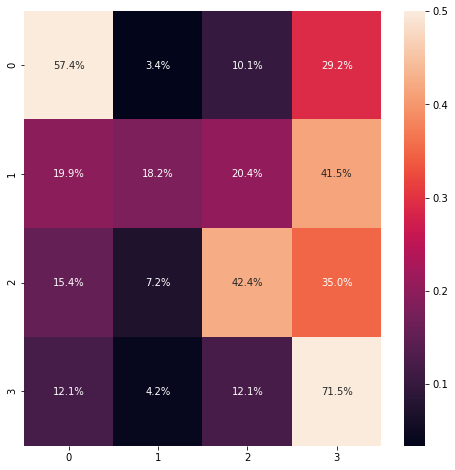

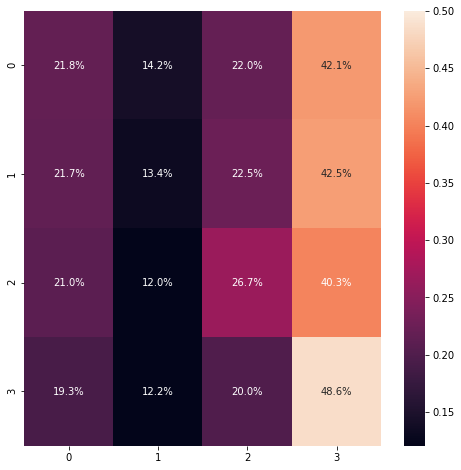

In [236]:
y_tr_pred_prob = tree.predict_proba(X_train)
y_tr_pred = tree.predict(X_train)
f1 = f1_score(y_train, y_tr_pred, average='weighted')
ll = log_loss(pd.get_dummies(y_train).values, y_tr_pred_prob)
print(f'F1 score train: {f1}')
print(f'LogLoss score train: {ll}')

y_te_pred_prob = tree.predict_proba(X_test)
y_te_pred = tree.predict(X_test)
f1 = f1_score(y_test, y_te_pred, average='weighted')
ll = log_loss(pd.get_dummies(y_test).values, y_te_pred_prob)
print(f'F1 score test: {f1}')
print(f'LogLoss score test: {ll}')

confusion_matrix_plot(y_train, y_tr_pred, class_names=[0, 1, 2, 3])
confusion_matrix_plot(y_test, y_te_pred, class_names=[0, 1, 2, 3])

In [237]:
%%time
rfc = RandomForestClassifier(n_estimators=1000, 
                             max_depth=10, 
                             min_samples_leaf=5, 
                             class_weight='balanced', 
                             random_state=random_state)
rfc.fit(X_train, y_train)

CPU times: user 1min 6s, sys: 122 ms, total: 1min 6s
Wall time: 1min 6s


F1 score train: 0.700026022850364
LogLoss score train: 1.2196774268015365
F1 score test: 0.4260933773361334
LogLoss score test: 1.3257207299867624


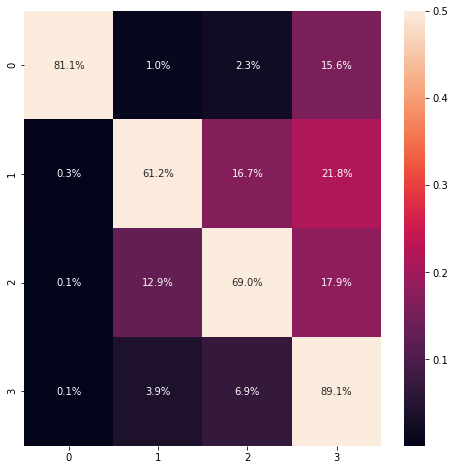

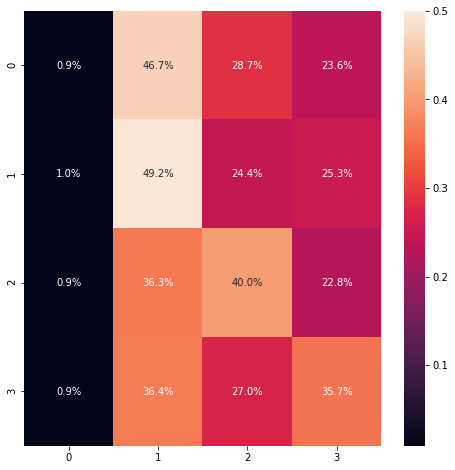

In [238]:
y_tr_pred_prob = rfc.predict_proba(X_train)
y_tr_pred = rfc.predict(X_train)
f1 = f1_score(y_train, y_tr_pred, average='weighted')
ll = log_loss(pd.get_dummies(y_train).values, y_tr_pred_prob)
print(f'F1 score train: {f1}')
print(f'LogLoss score train: {ll}')

y_te_pred_prob = rfc.predict_proba(X_test)
y_te_pred = rfc.predict(X_test)
f1 = f1_score(y_test, y_te_pred, average='weighted')
ll = log_loss(pd.get_dummies(y_test).values, y_te_pred_prob)
print(f'F1 score test: {f1}')
print(f'LogLoss score test: {ll}')

confusion_matrix_plot(y_train, y_tr_pred, class_names=[0, 1, 2, 3])
confusion_matrix_plot(y_test, y_te_pred, class_names=[0, 1, 2, 3])

In [245]:
%%time
svm = SVC(class_weight='balanced', probability=True, random_state=random_state)
svm.fit(X_train, y_train)

CPU times: user 2h 15min 54s, sys: 17.8 s, total: 2h 16min 12s
Wall time: 2h 16min 28s


F1 score train: 0.41123134781531306
LogLoss score train: 1.0736086491595895
F1 score test: 0.323439846293264
LogLoss score test: 1.098497322477392


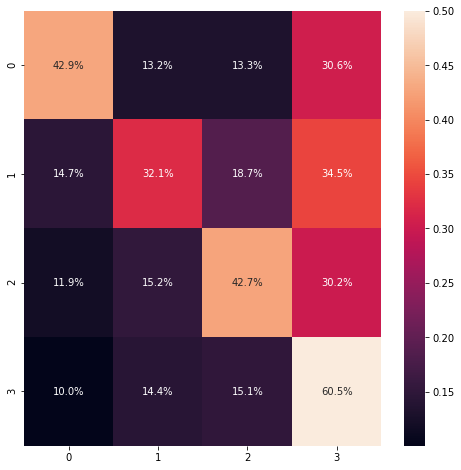

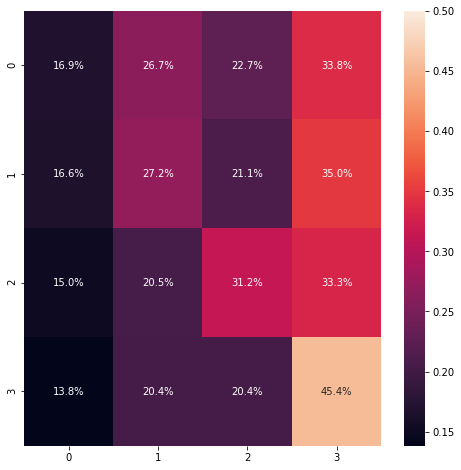

In [246]:
y_tr_pred_prob = svm.predict_proba(X_train)
y_tr_pred = svm.predict(X_train)
f1 = f1_score(y_train, y_tr_pred, average='weighted')
ll = log_loss(pd.get_dummies(y_train).values, y_tr_pred_prob)
print(f'F1 score train: {f1}')
print(f'LogLoss score train: {ll}')

y_te_pred_prob = svm.predict_proba(X_test)
y_te_pred = svm.predict(X_test)
f1 = f1_score(y_test, y_te_pred, average='weighted')
ll = log_loss(pd.get_dummies(y_test).values, y_te_pred_prob)
print(f'F1 score test: {f1}')
print(f'LogLoss score test: {ll}')

confusion_matrix_plot(y_train, y_tr_pred, class_names=[0, 1, 2, 3])
confusion_matrix_plot(y_test, y_te_pred, class_names=[0, 1, 2, 3])

In [249]:
X_sub = test_data.drop(columns=['id'])

In [250]:
%%time
y_sub_pred = svm.predict_proba(X_sub)

CPU times: user 6min 13s, sys: 92.7 ms, total: 6min 13s
Wall time: 6min 13s


In [251]:
submission.iloc[:, 1:] = y_sub_pred
submission.to_csv('lightautoml_2lv10.csv', index = False)

In [253]:
%%time
y_sub_pred = rfc.predict_proba(X_sub)
submission.iloc[:, 1:] = y_sub_pred
submission.to_csv('../../../data/kaggle/TPS_MAY2021/lightautoml_2lv11.csv', index = False)

CPU times: user 6.46 s, sys: 46.6 ms, total: 6.51 s
Wall time: 7.73 s


In [ ]:
# plt.figure(figsize=(8,4))
# plt.hist(y_pred[np.where(y_test == 0)], bins=100, alpha=0.75, label='neg class')
# plt.hist(y_pred[np.where(y_test == 1)], bins=100, alpha=0.75, label='pos class')
# plt.legend()
# plt.show()